In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = pd.read_json(url)
df = pd.json_normalize(data.to_dict(orient="records"), sep='_')
df.columns = [col.split('_')[-1] for col in df.columns]
df.drop(columns=["customerID","PaperlessBilling","gender"],inplace=True)

# Tratamiento de Datos

## Valores faltantes en Total

In [4]:
df[df["Total"].isin(['', ' '])]

Churn  SeniorCitizen Partner Dependents  tenure PhoneService  \
975     No              0     Yes        Yes       0           No   
1775    No              0     Yes        Yes       0          Yes   
1955    No              0      No        Yes       0          Yes   
2075    No              0     Yes        Yes       0          Yes   
2232    No              0      No        Yes       0          Yes   
2308    No              0     Yes        Yes       0          Yes   
2930    No              0     Yes        Yes       0          Yes   
3134    No              0     Yes        Yes       0          Yes   
3203    No              0     Yes        Yes       0           No   
4169    No              0     Yes        Yes       0          Yes   
5599    No              0     Yes        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
975   No phone service             DSL                  Yes   
1775                No              No  No internet service   
1955               Yes             DSL                  Yes   
2075                No              No  No internet service   
2232                No              No  No internet service   
2308               Yes              No  No internet service   
2930               Yes             DSL                   No   
3134               Yes              No  No internet service   
3203  No phone service             DSL                  Yes   
4169                No             DSL                  Yes   
5599                No              No  No internet service   

             OnlineBackup     DeviceProtection          TechSupport  \
975                   Yes                  Yes                  Yes   
1775  No internet service  No internet service  No internet service   
1955                  Yes                   No                  Yes   
2075  No internet service  No internet service  No internet service   
2232  No internet service  No internet service  No internet service   
2308  No internet service  No internet service  No internet service   
2930                  Yes                  Yes                  Yes   
3134  No internet service  No internet service  No internet service   
3203                   No                  Yes                  Yes   
4169                  Yes                  Yes                   No   
5599  No internet service  No internet service  No internet service   

              StreamingTV      StreamingMovies  Contract  \
975                   Yes                   No  Two year   
1775  No internet service  No internet service  Two year   
1955                   No                   No  Two year   
2075  No internet service  No internet service  One year   
2232  No internet service  No internet service  Two year   
2308  No internet service  No internet service  Two year   
2930                  Yes                   No  Two year   
3134  No internet service  No internet service  Two year   
3203                  Yes                   No  Two year   
4169                  Yes                  Yes  Two year   
5599  No internet service  No internet service  Two year   

                  PaymentMethod  Monthly Total  
975     Credit card (automatic)    56.05        
1775               Mailed check    20.00        
1955  Bank transfer (automatic)    61.90        
2075               Mailed check    19.70        
2232               Mailed check    20.25        
2308               Mailed check    25.35        
2930               Mailed check    73.35        
3134               Mailed check    25.75        
3203  Bank transfer (automatic)    52.55        
4169               Mailed check    80.85        
5599               Mailed check    19.85

In [5]:
df["Total"] = pd.to_numeric(df["Total"], errors='coerce')
df["Total"] = df["Total"].fillna(df["Monthly"] * df["tenure"])

In [6]:
df[df["Total"].isin(['', ' '])]

Empty DataFrame
Columns: [Churn, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod, Monthly, Total]
Index: []

## Datos Churn faltantes
#### Se imputaran los datos en base a la distribucion de churn

In [7]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [234]:
df["Churn"].value_counts(normalize=True)


Churn
0    0.733865
1    0.266135
Name: proportion, dtype: float64

In [9]:
df["Churn"].replace('', np.nan, inplace=True)
distribucion = df["Churn"].value_counts(normalize=True)
n_missing = df["Churn"].isna().sum()
np.random.seed(28)
valores_imputados = np.random.choice(distribucion.index, size=n_missing, p=distribucion.values)

C:\Users\Tomas\AppData\Local\Temp\ipykernel_42224\956047115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Churn"].replace('', np.nan, inplace=True)


In [10]:
# Asignar esos valores a las filas con NaN
df.loc[df["Churn"].isna(), "Churn"] = valores_imputados

In [11]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.733865
Yes    0.266135
Name: proportion, dtype: float64

## Buscamos mas inconsistencias en el DataFrame

In [12]:
columnas = df.columns
cols = []
for i in df.columns:
    cols.append(df[i].unique())

valores_unicos_por_columna = dict(zip(columnas, cols))


In [13]:
valores_unicos_por_columna

{'Churn': array(['No', 'Yes'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['Yes', 'No'], dtype=object),
 'tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'PhoneService': array(['Yes', 'No'], dtype=object),
 'MultipleLines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport': array(['Yes', 'No', 'No intern

### Reemplazamos los valores Yes/No con binarios

In [18]:
columnas_convertir_binario = ['Churn','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df[columnas_convertir_binario] = df[columnas_convertir_binario].replace({'Yes': 1, 'No': 0})

df["MultipleLines"] = df["MultipleLines"].replace("No phone service", "No")

C:\Users\Tomas\AppData\Local\Temp\ipykernel_42224\2760926572.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_convertir_binario] = df[columnas_convertir_binario].replace({'Yes': 1, 'No': 0})


In [19]:
internet_cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                 "TechSupport", "StreamingTV", "StreamingMovies"]

for col in internet_cols:
    df[col] = df[col].replace("No internet service", "No") 

In [20]:
df.OnlineSecurity.value_counts()

OnlineSecurity
0    5189
1    2078
Name: count, dtype: int64

In [21]:
columnas = df.columns
cols = []
for i in df.columns:
    cols.append(df[i].unique())

valores_unicos_por_columna2 = dict(zip(columnas, cols))
valores_unicos_por_columna2

{'Churn': array([0, 1]),
 'SeniorCitizen': array([0, 1]),
 'Partner': array([1, 0]),
 'Dependents': array([1, 0]),
 'tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'PhoneService': array([1, 0]),
 'MultipleLines': array([0, 1]),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array([0, 1]),
 'OnlineBackup': array([1, 0]),
 'DeviceProtection': array([0, 1]),
 'TechSupport': array([1, 0]),
 'StreamingTV': array([1, 0]),
 'StreamingMovies': array([0, 1]),
 'Contract': array(['One year', 'Month-to-month', 'Two year'], dtype=object),
 'PaymentMethod': array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
        'Bank transfer (automatic)'], dt

## Creamos la columna de "Cuentas_Diarias"

In [22]:
df["Cuentas_Diarias"] = df["Monthly"] / 30

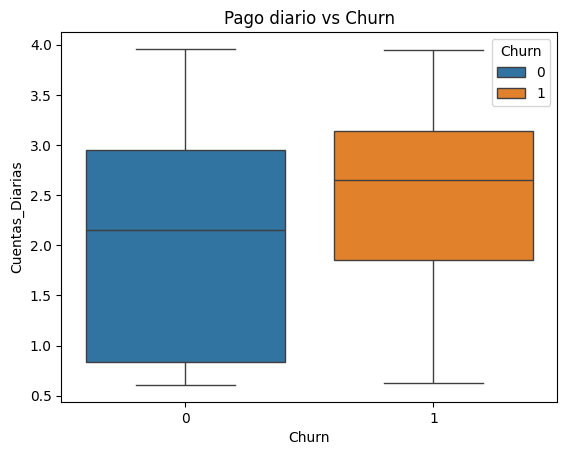

In [23]:
sns.boxplot(data=df, x="Churn", y="Cuentas_Diarias",hue="Churn")
plt.title("Pago diario vs Churn")
plt.show()

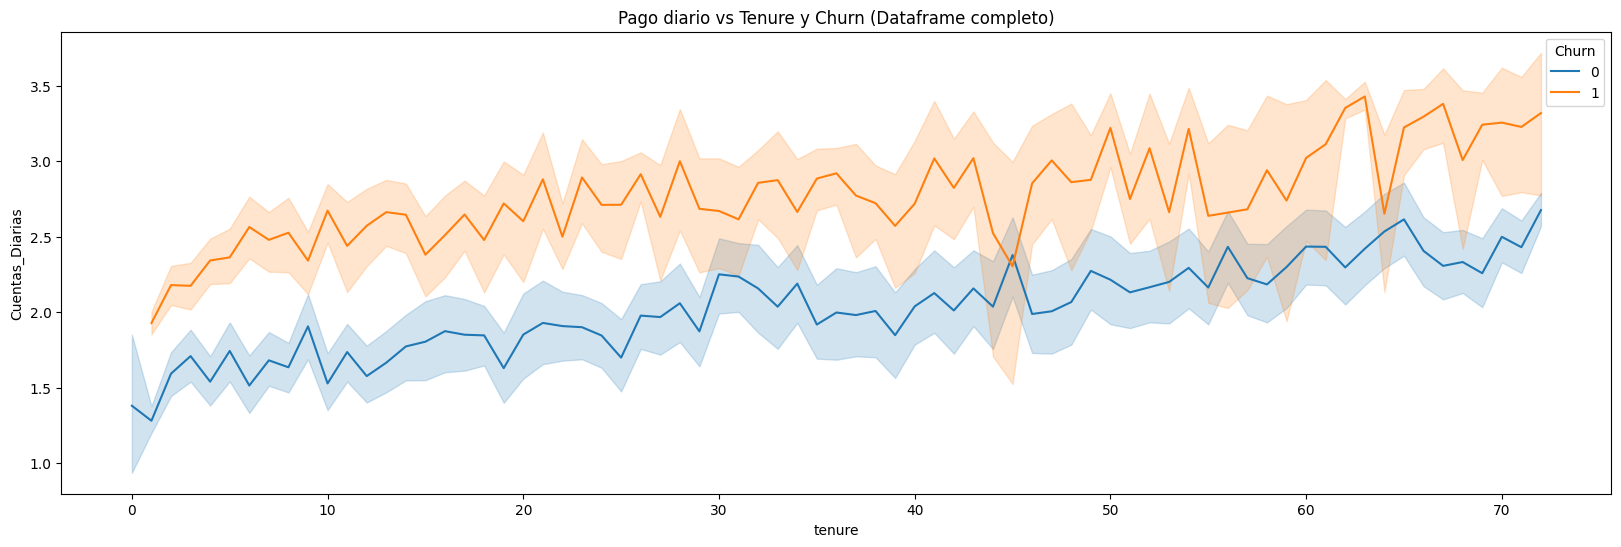

In [185]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="tenure", y="Cuentas_Diarias", hue="Churn", data=df)
plt.title("Pago diario vs Tenure y Churn (Dataframe completo)")
plt.show()

Text(0.5, 1.0, 'Churn vs Cuentas Diarias en tipos de contrato')

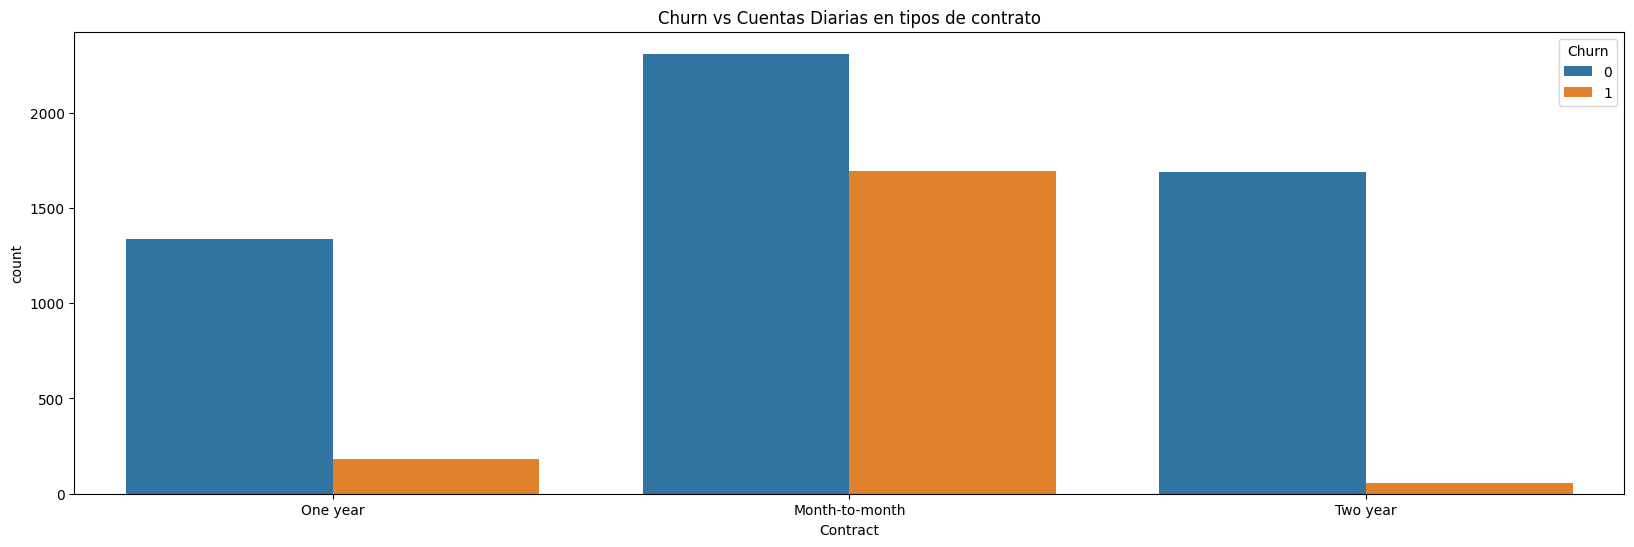

In [25]:
plt.figure(figsize=(20, 6))
sns.countplot(x="Contract",  hue="Churn", data=df)
plt.title("Churn vs Cuentas Diarias en tipos de contrato")


In [27]:
df.Contract.value_counts()

Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

## Buscamos correlaciones entre las columnas

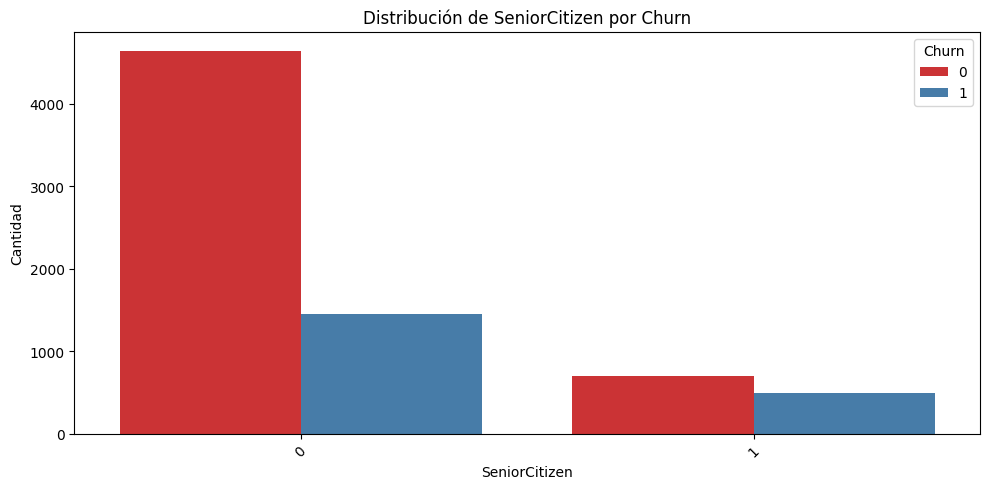

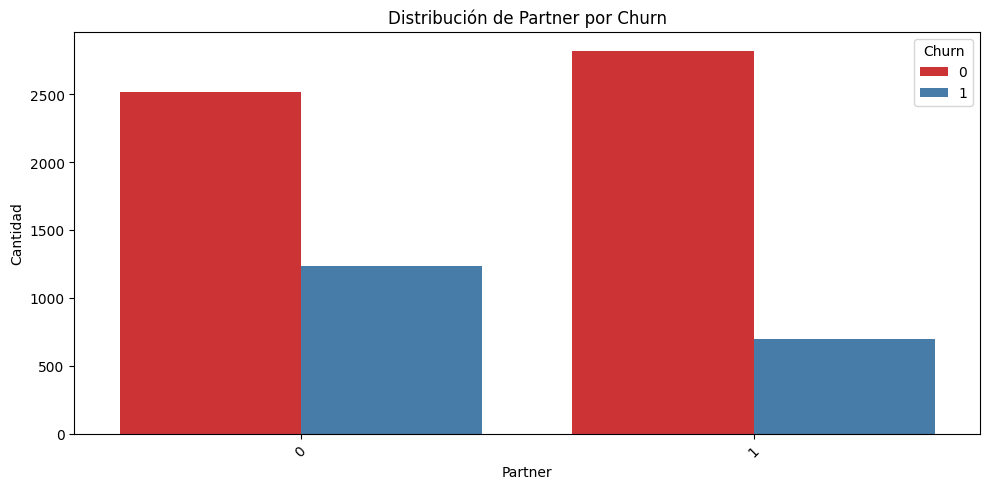

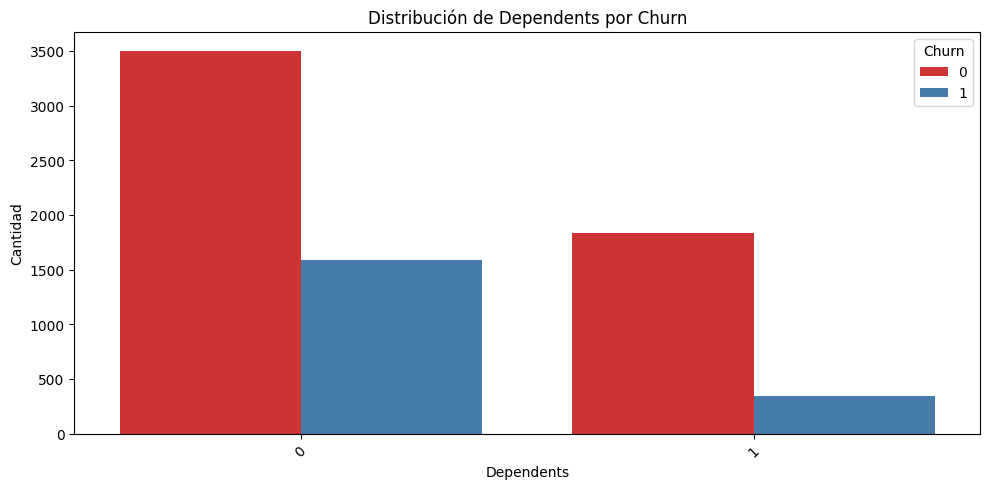

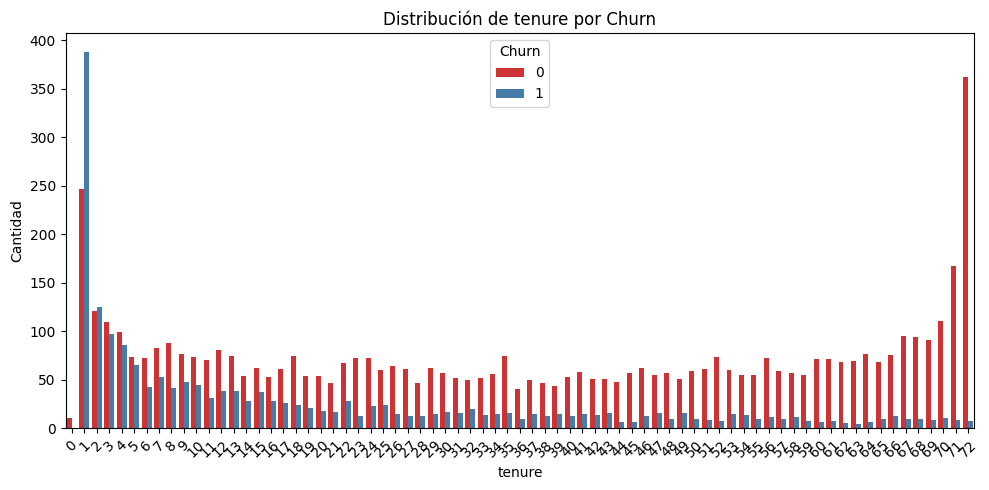

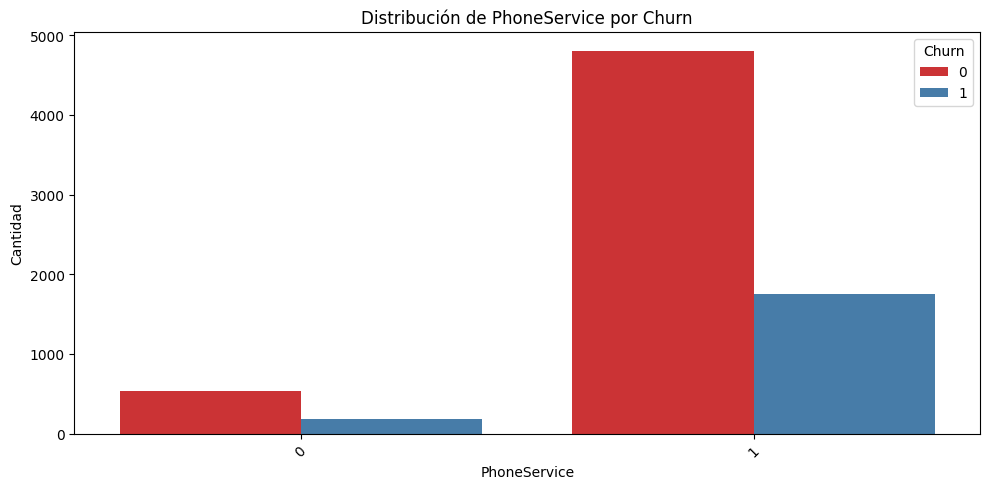

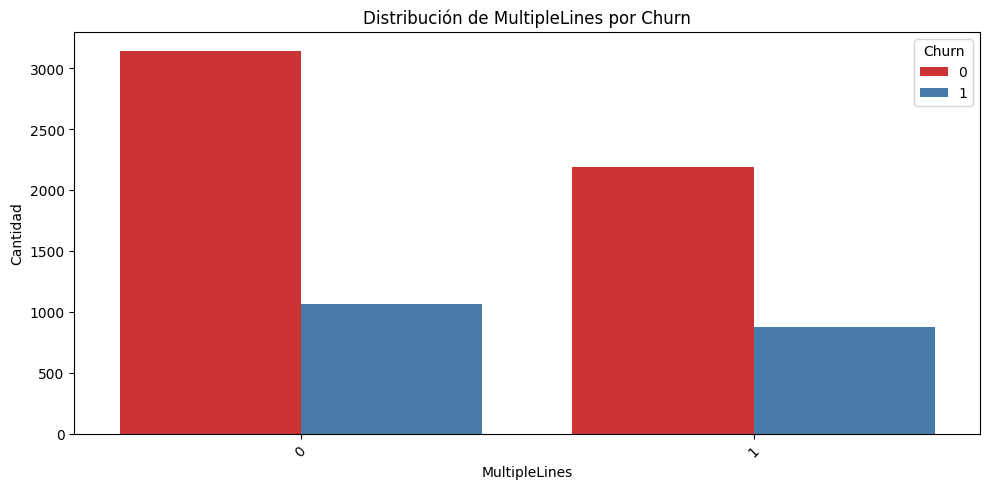

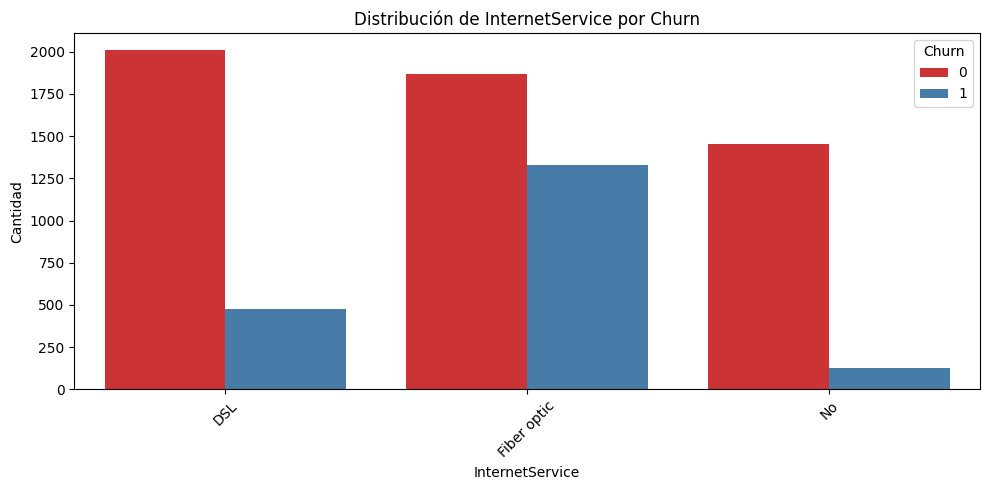

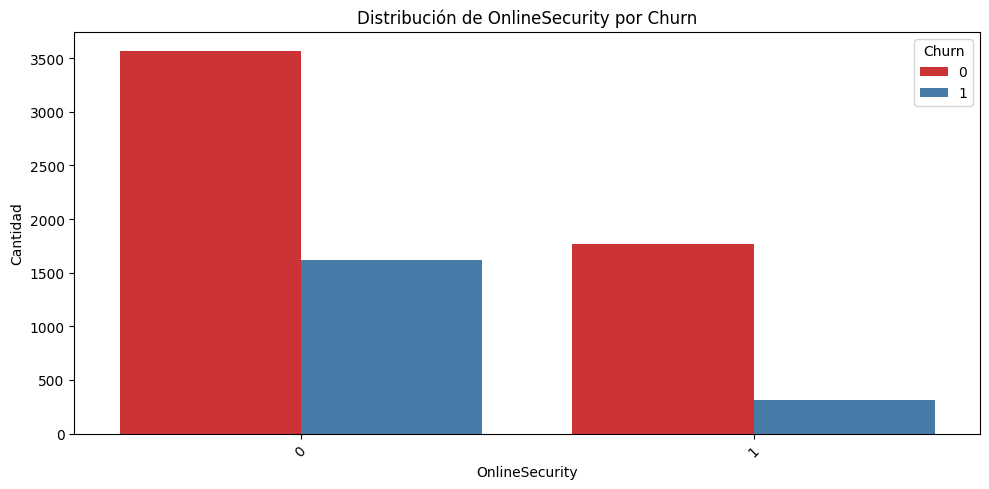

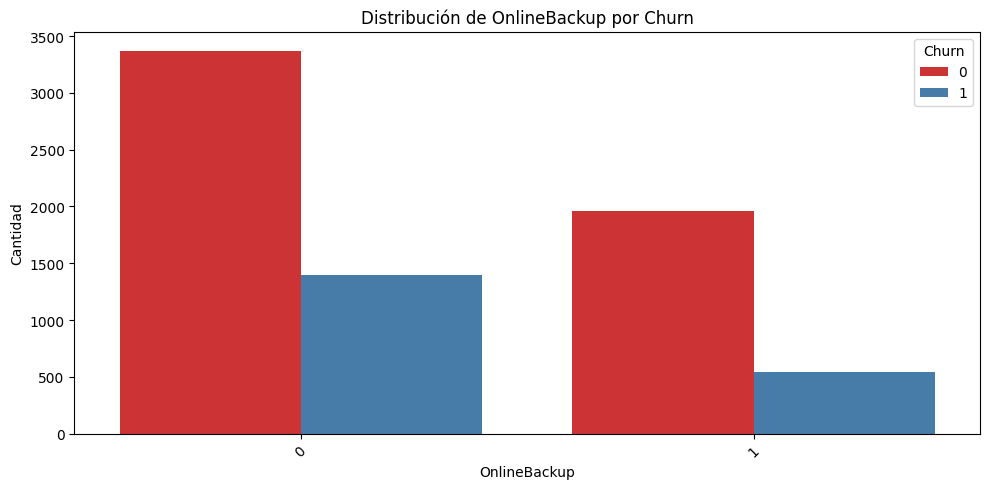

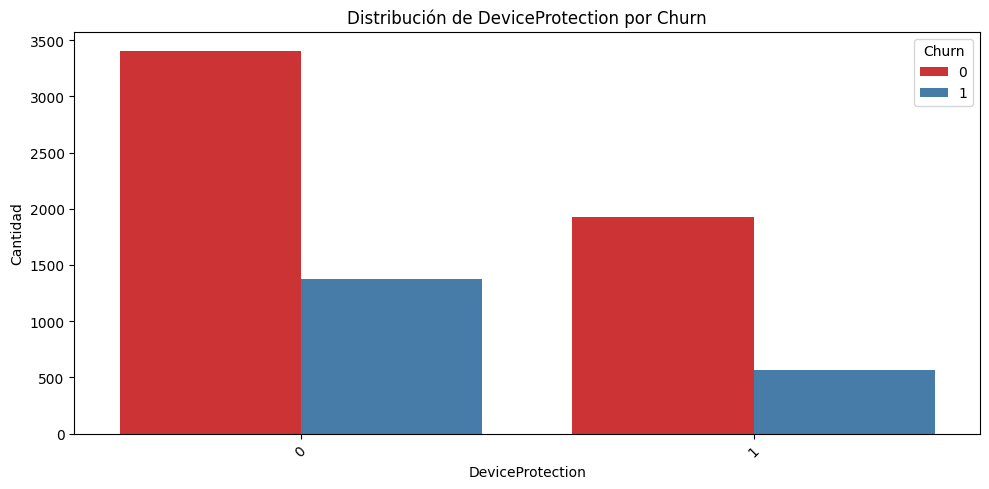

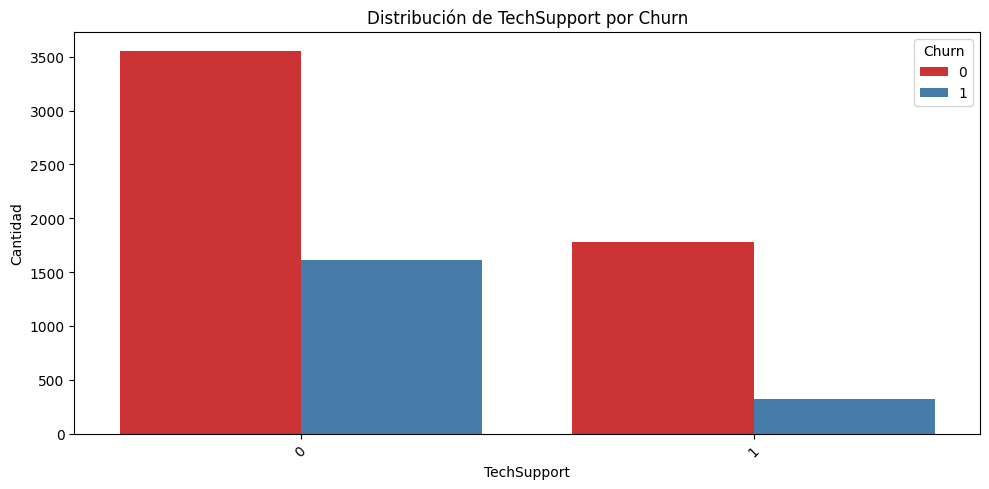

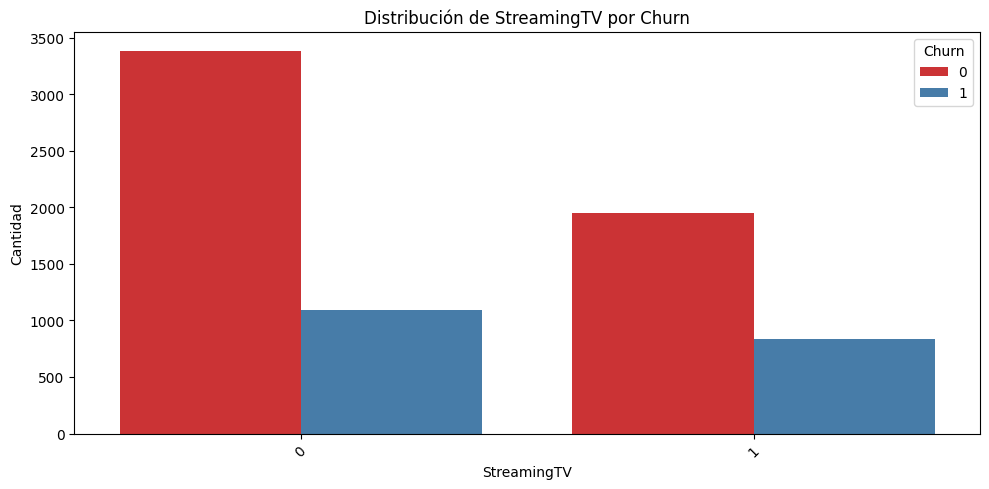

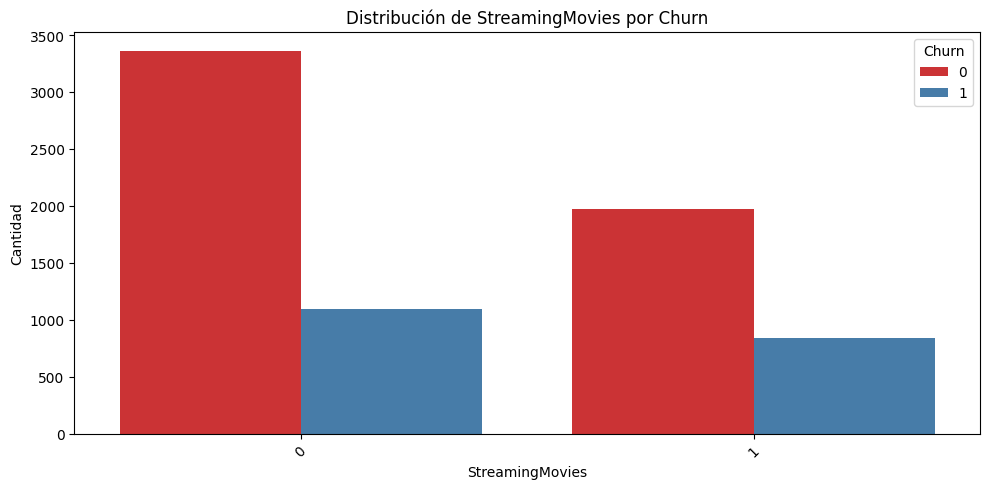

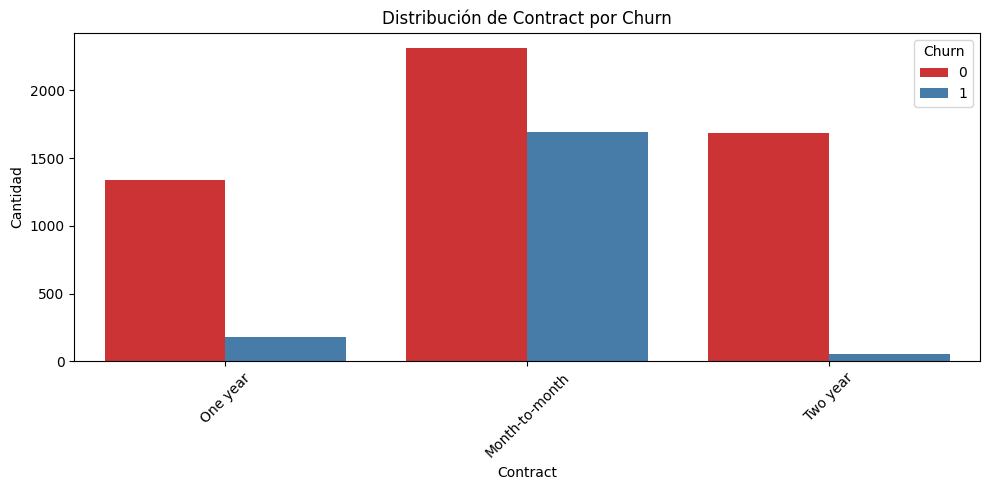

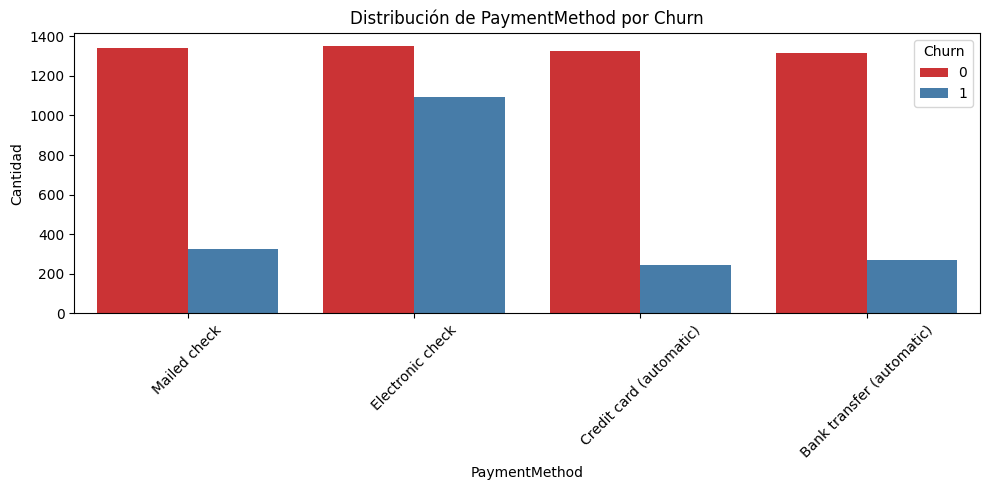

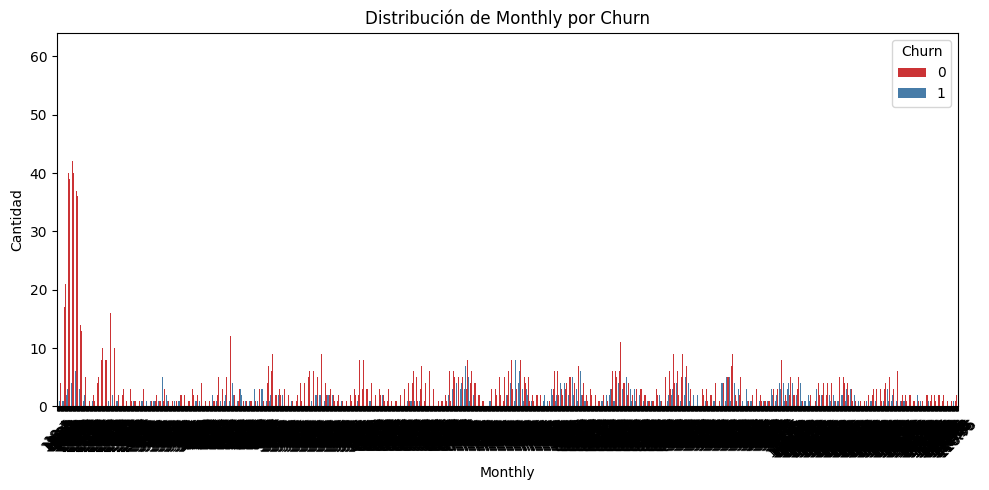

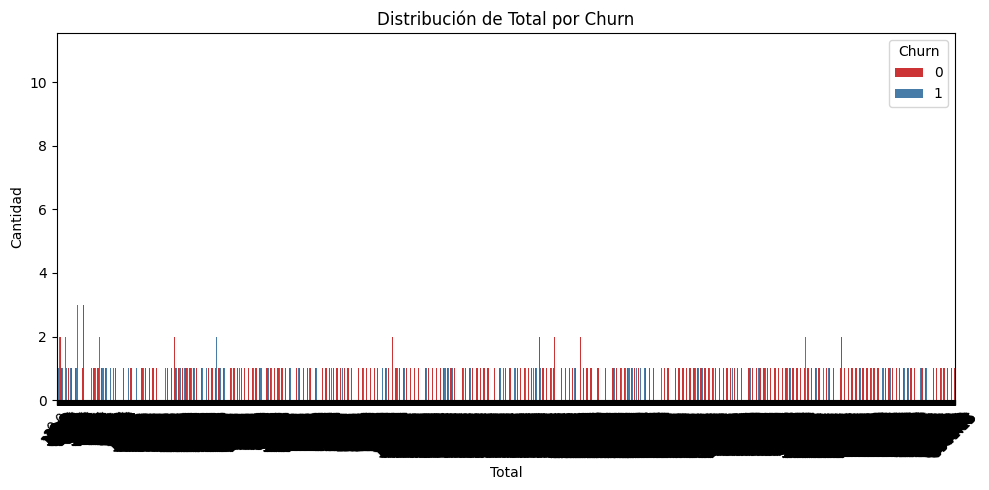

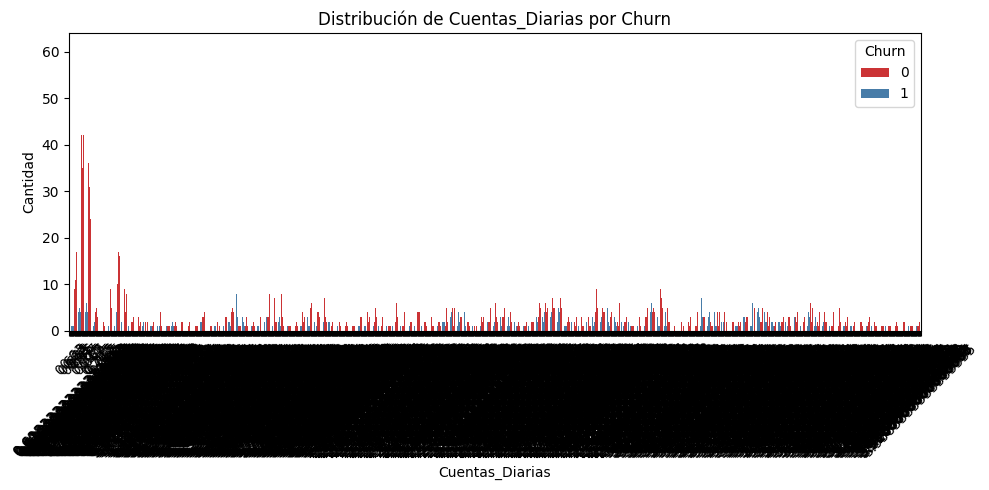

In [28]:
colum = df.columns.drop("Churn")
for i in colum:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[i], hue=df["Churn"], palette="Set1")
    plt.title(f"Distribución de {i} por Churn")
    plt.xlabel(i)
    plt.ylabel("Cantidad")
    plt.xticks(rotation=45)
    plt.legend(title="Churn")
    plt.tight_layout()
    plt.show()

In [29]:
df.corr(numeric_only=True)["Churn"].sort_values(ascending=False)


Churn               1.000000
Monthly             0.186534
Cuentas_Diarias     0.186534
SeniorCitizen       0.146327
StreamingTV         0.061774
StreamingMovies     0.059801
MultipleLines       0.036127
PhoneService        0.010672
DeviceProtection   -0.066220
OnlineBackup       -0.082165
Partner            -0.147830
Dependents         -0.158599
TechSupport        -0.161301
OnlineSecurity     -0.165401
Total              -0.192529
tenure             -0.342515
Name: Churn, dtype: float64

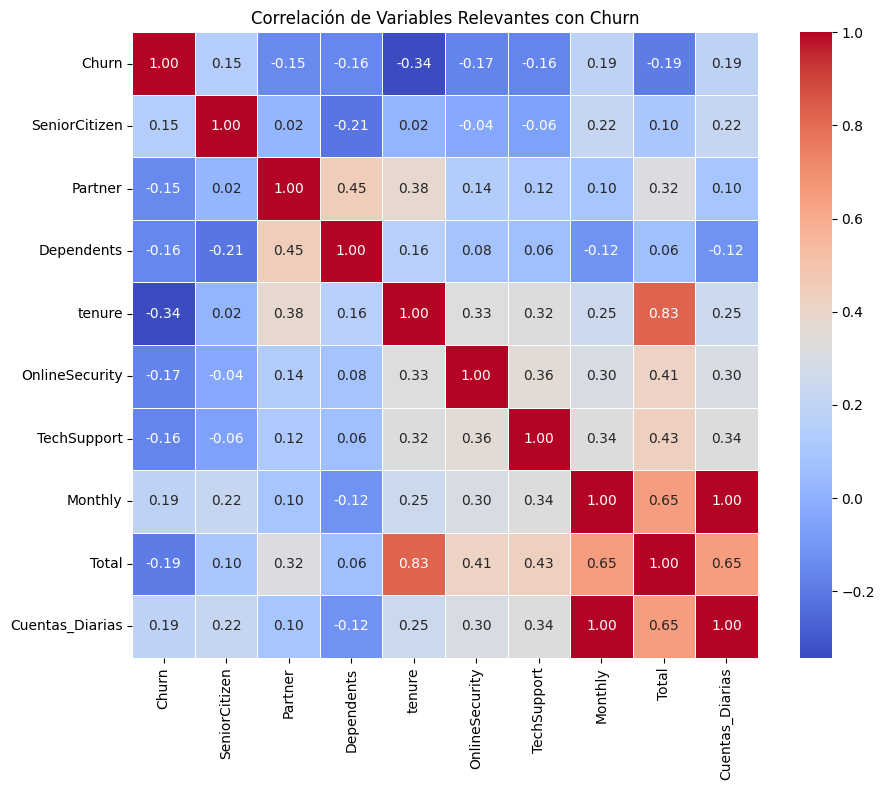

In [30]:

# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular correlación
corr_matrix = df_numeric.corr()

# Filtrar columnas con correlación absoluta >= 0.1 con respecto a 'Churn'
threshold = 0.1
correlated_cols = corr_matrix['Churn'][abs(corr_matrix['Churn']) >= threshold].index

# Subset del DataFrame con solo las columnas correlacionadas
filtered_corr = df_numeric[correlated_cols].corr()

# Graficar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlación de Variables Relevantes con Churn')
plt.tight_layout()
plt.show()


### Creacion de columna de Numero de Servicios Contratados
#### Esta columna cuenta el numero de servicios que tiene contratado el cliente

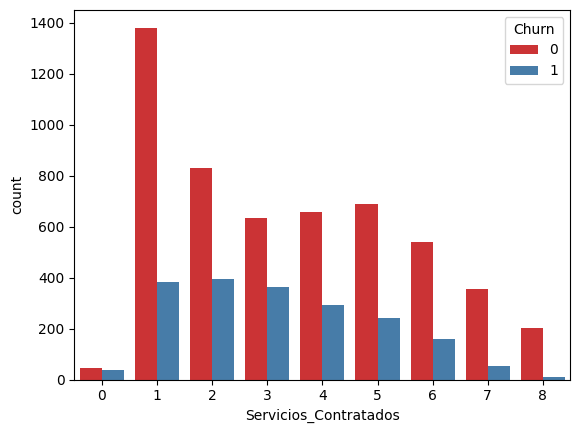

In [54]:
servicios = [
    'PhoneService', 
    'MultipleLines', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies'
]
df["Servicios_Contratados"] = df[servicios].sum(axis=1)
sns.countplot(data=df, x="Servicios_Contratados", hue="Churn", palette="Set1")
plt.show()

### Al observar los datos encontramos que habia gran cantidad de Churn en las personas que utilizaban el metodo de pago de Electronic Check, y vamos a ver que relacion tiene con el servicio de OnlineSecurity

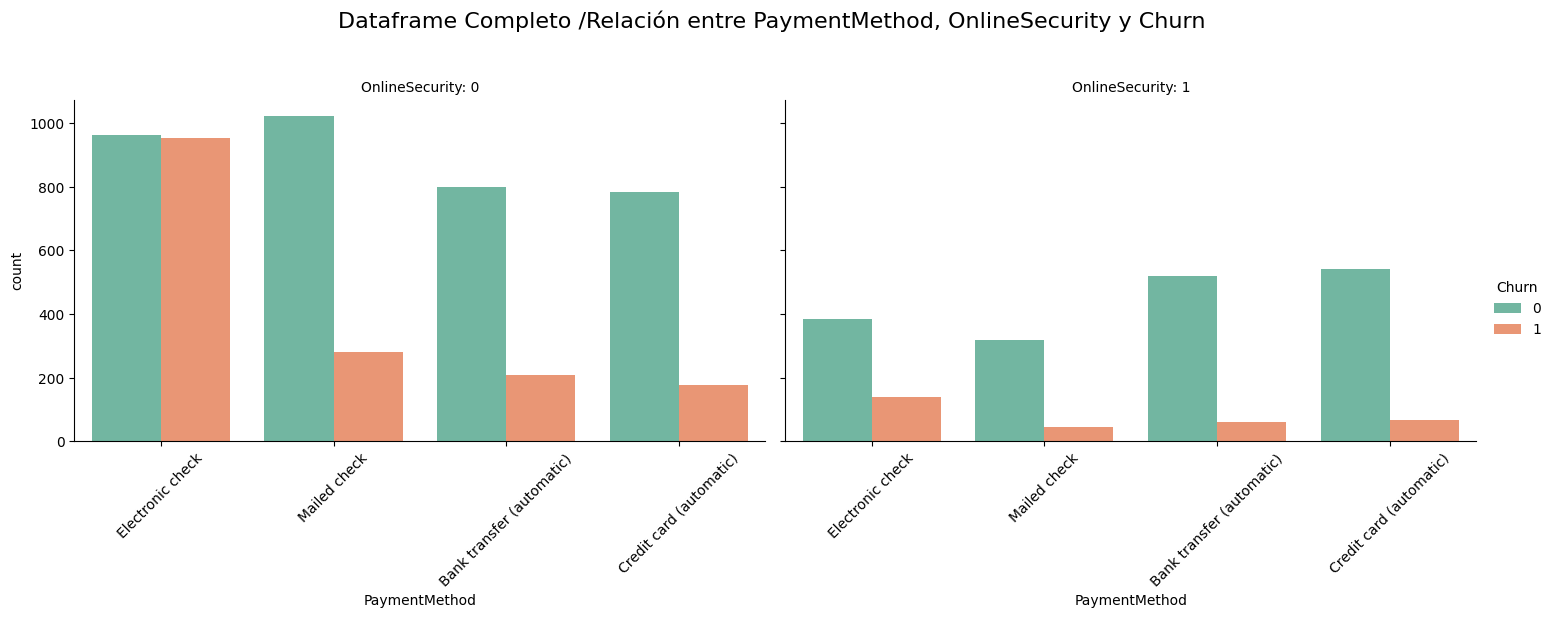

In [55]:
g = sns.catplot(data=df, x="PaymentMethod", hue="Churn", col="OnlineSecurity",
                kind="count", height=5, aspect=1.5,
                order=df["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("OnlineSecurity: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe Completo /Relación entre PaymentMethod, OnlineSecurity y Churn", fontsize=16)
plt.show()

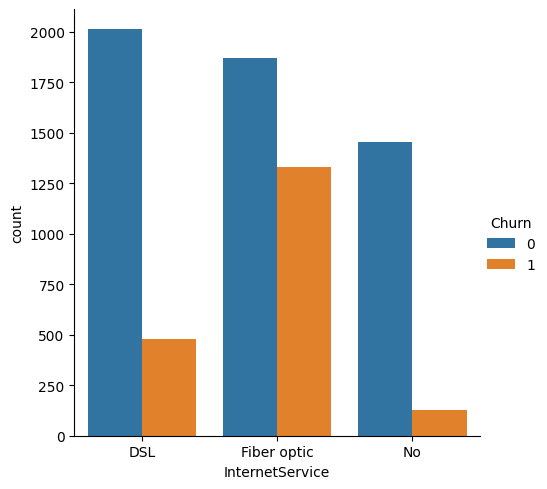

In [56]:
sns.catplot(
    data=df, kind="count",
    x="InternetService", hue="Churn",
)
plt.show()

## Crearemos un dataframe con los datos de contratos solo Mont-Month para evaluar las razones del churn

In [57]:
df_m = df[df["Contract"] == "Month-to-month"]

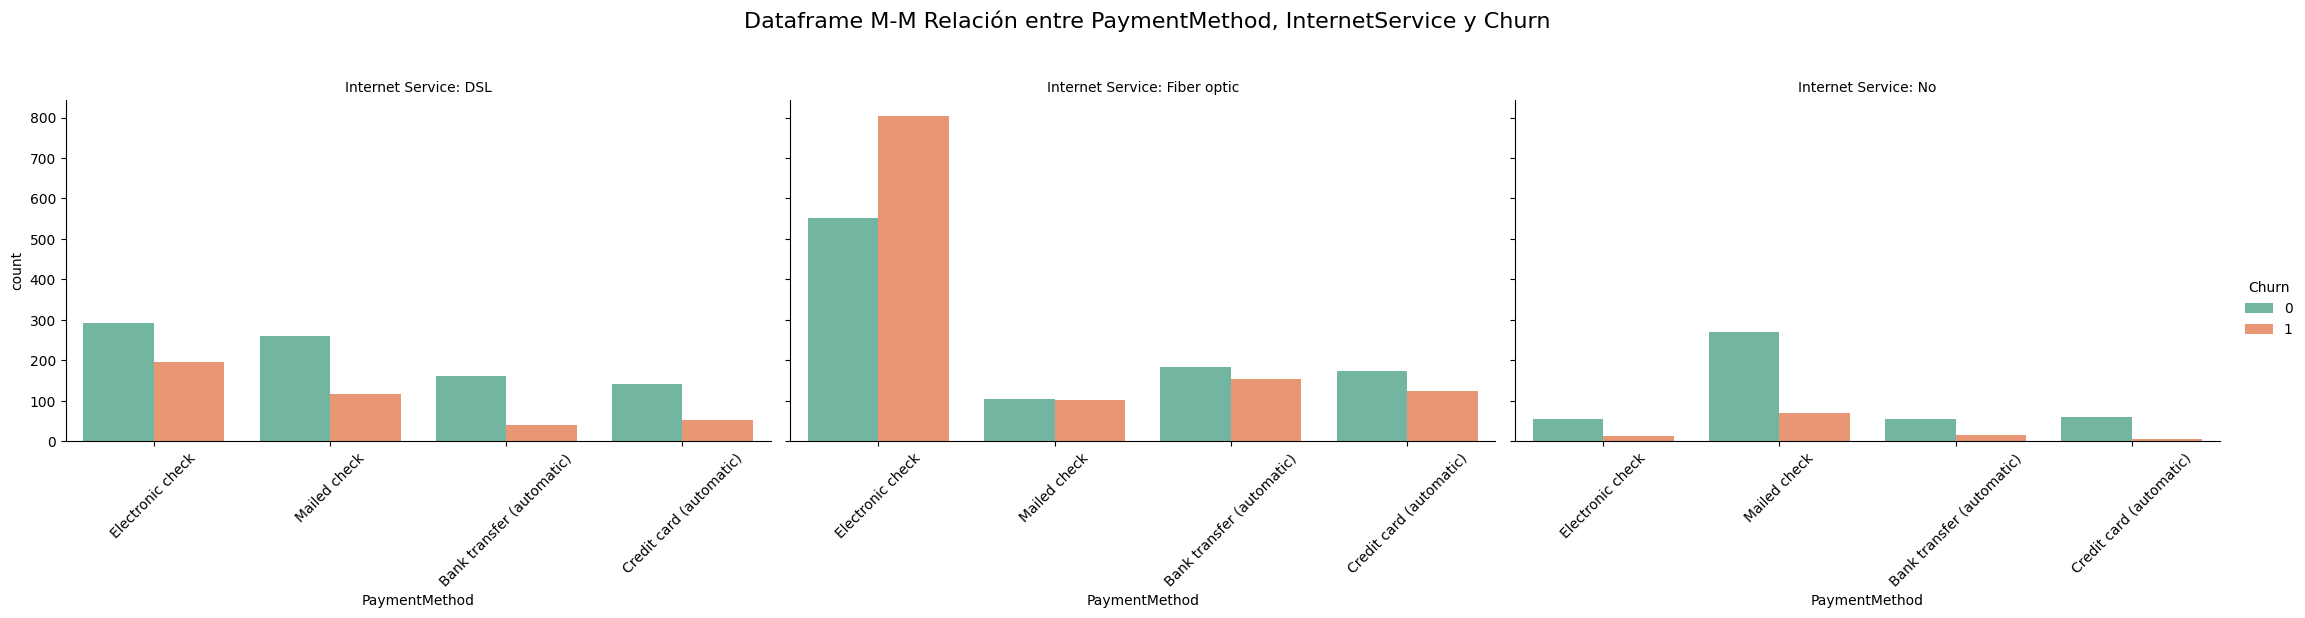

In [172]:
g = sns.catplot(data=df_m, x="PaymentMethod", hue="Churn", col="InternetService",
                kind="count", height=5, aspect=1.5,
                order=df_m["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("Internet Service: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe M-M Relación entre PaymentMethod, InternetService y Churn", fontsize=16)
plt.show()

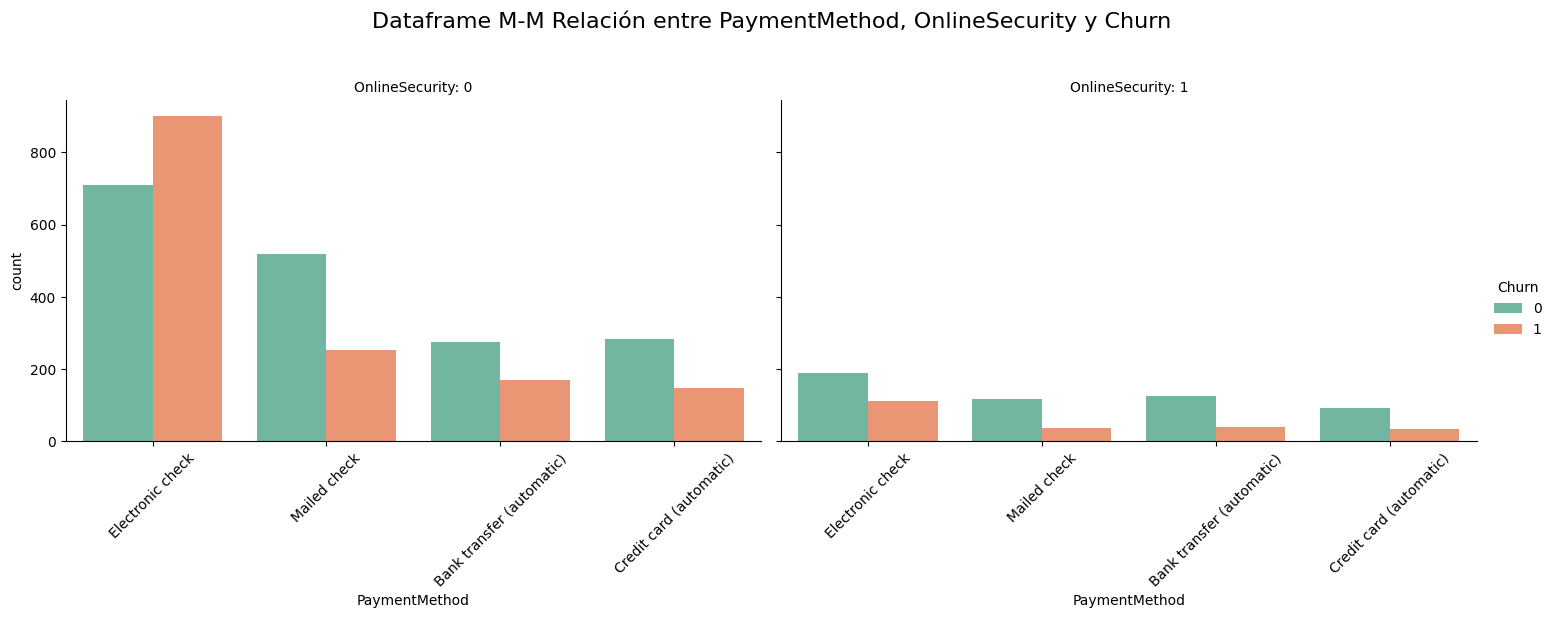

In [171]:
g = sns.catplot(data=df_m, x="PaymentMethod", hue="Churn", col="OnlineSecurity",
                kind="count", height=5, aspect=1.5,
                order=df_m["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("OnlineSecurity: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe M-M Relación entre PaymentMethod, OnlineSecurity y Churn", fontsize=16)
plt.show()

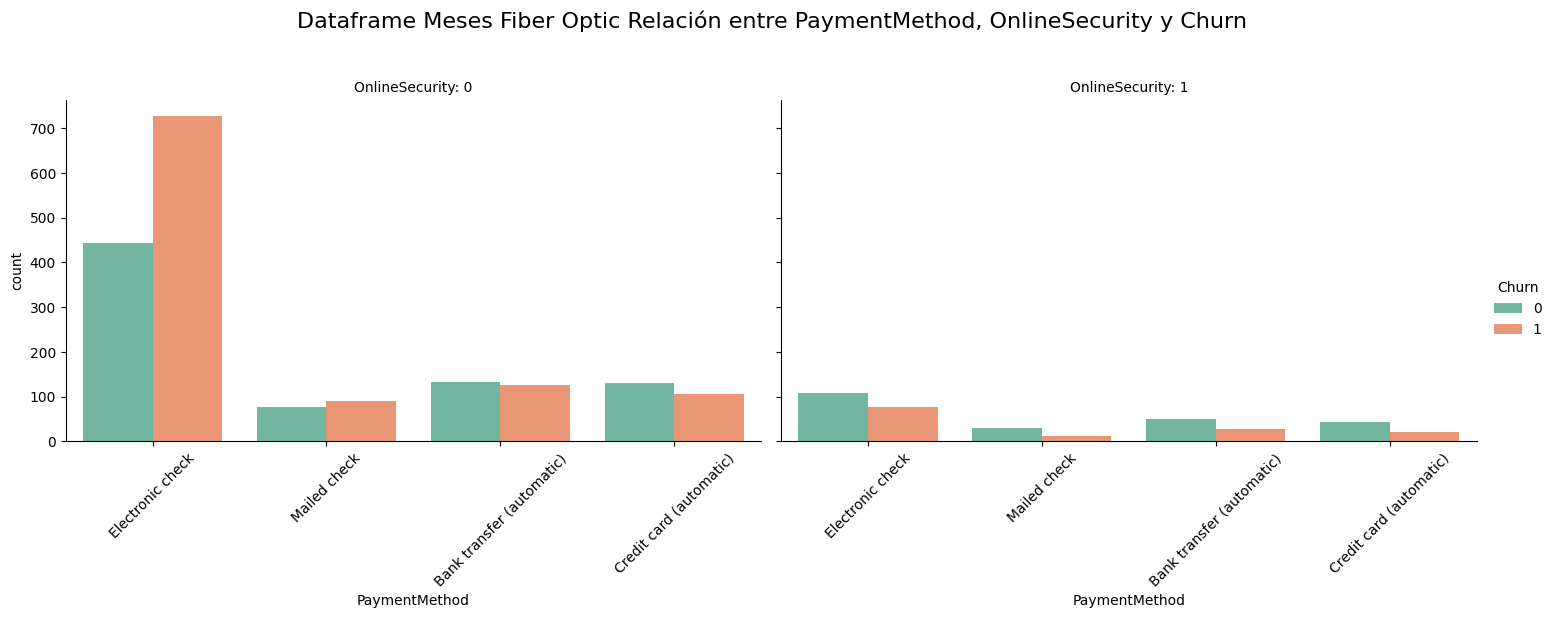

In [148]:
g = sns.catplot(data=df_m[df_m["InternetService"]=="Fiber optic"], x="PaymentMethod", hue="Churn", col="OnlineSecurity",
                kind="count", height=5, aspect=1.5,
                order=df_m["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("OnlineSecurity: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe Meses Fiber Optic Relación entre PaymentMethod, OnlineSecurity y Churn", fontsize=16)
plt.show()

<Axes: xlabel='tenure', ylabel='Monthly'>

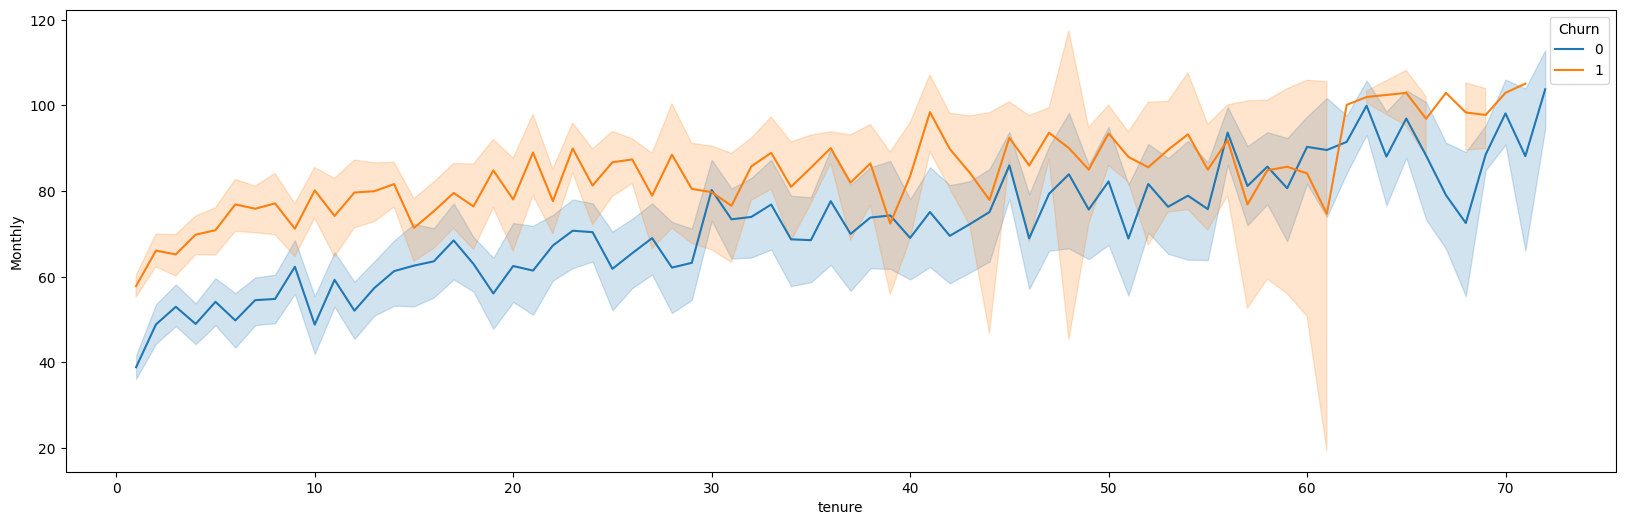

In [149]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="tenure", y="Monthly", hue="Churn", data=df_m)

<Axes: xlabel='tenure', ylabel='Monthly'>

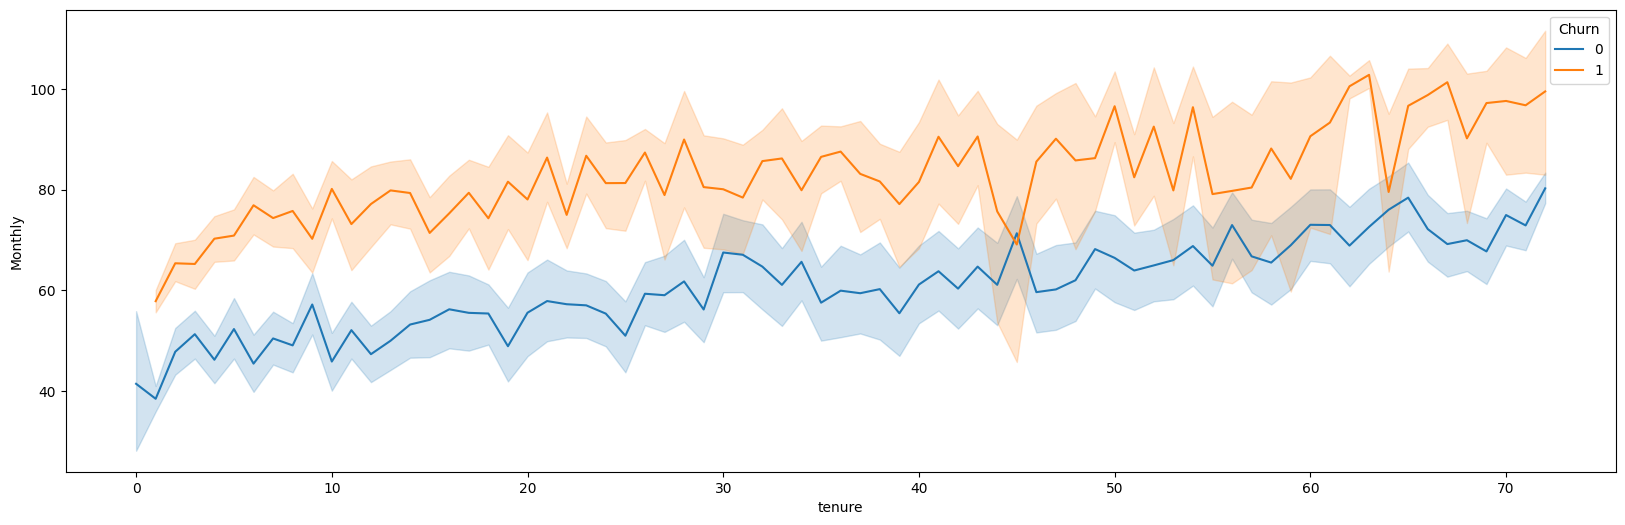

In [150]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="tenure", y="Monthly", hue="Churn", data=df)

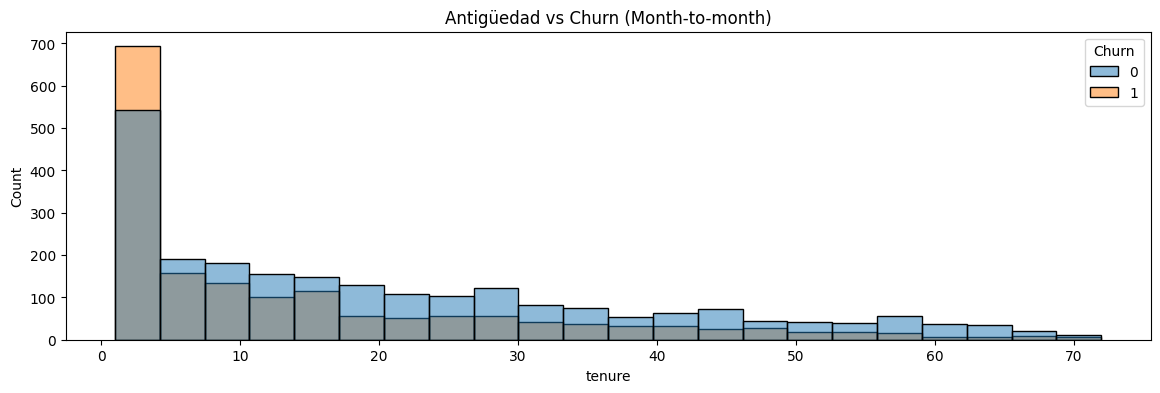

In [62]:
plt.figure(figsize=(14, 4))
sns.histplot(data=df_m, x="tenure", hue="Churn")
plt.title("Antigüedad vs Churn (Month-to-month)")
plt.show()


## Enfocar en Usuarios mas nuevos
### Podemos observar que se siguen los mismos patrones que existen en el DataFrame completo por lo cual vamos a enfocarnos en donde sucede la mayor cantidad de churn el cual es cuando ternure es menor a 10

In [98]:
df_10 = df_m[df_m["tenure"]<10]

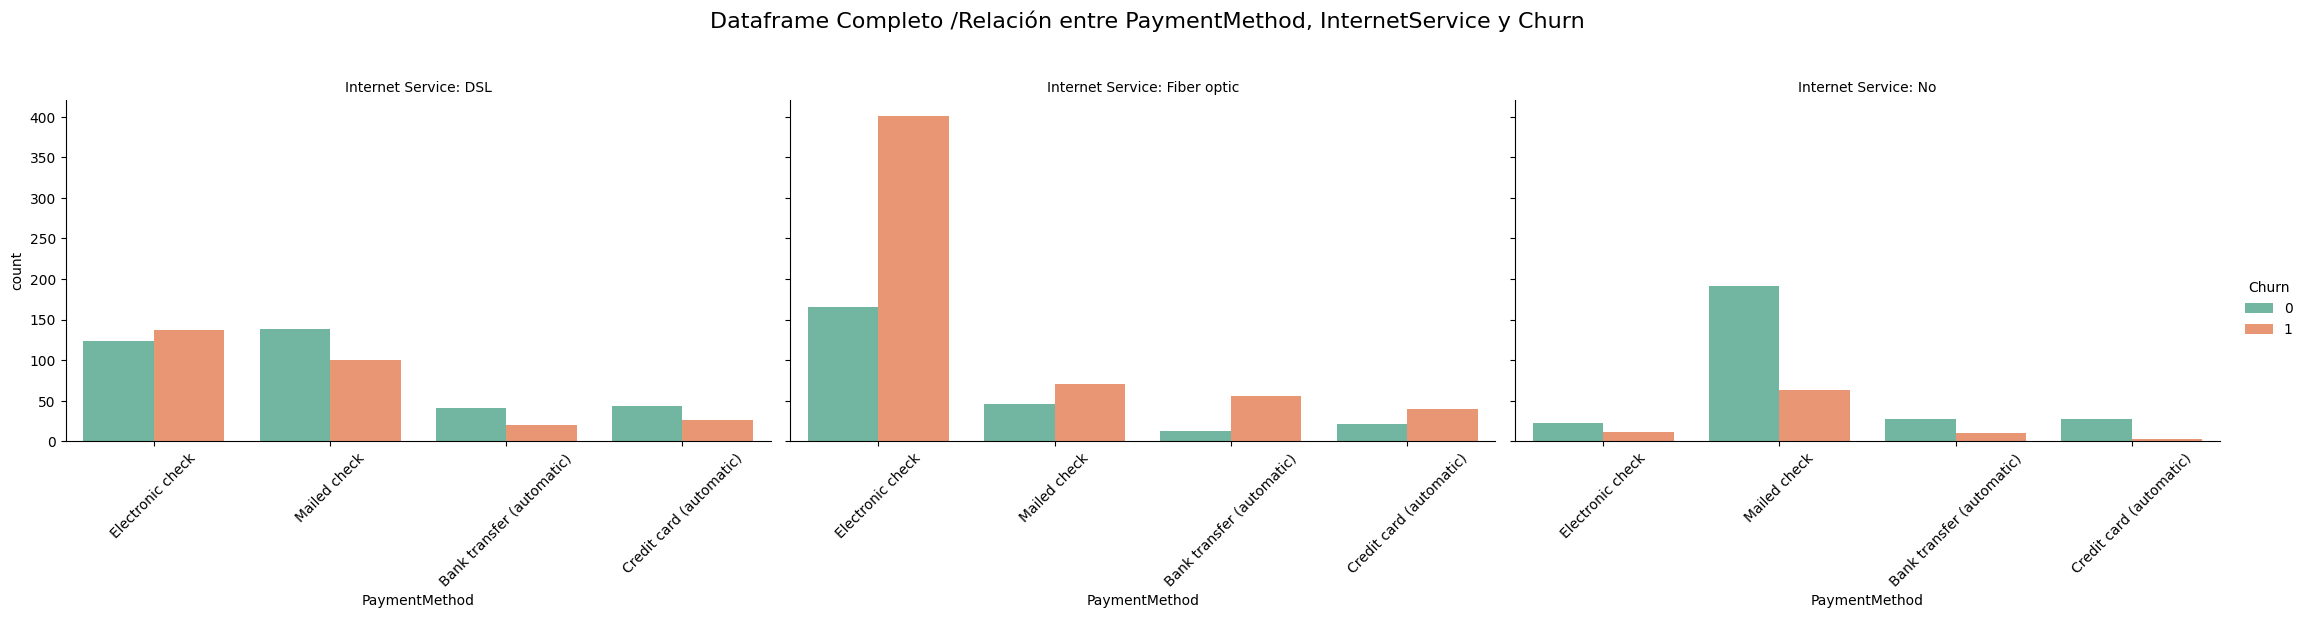

In [151]:
g = sns.catplot(data=df_10, x="PaymentMethod", hue="Churn", col="InternetService",
                kind="count", height=5, aspect=1.5,
                order=df_10["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("Internet Service: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe Completo /Relación entre PaymentMethod, InternetService y Churn", fontsize=16)
plt.show()

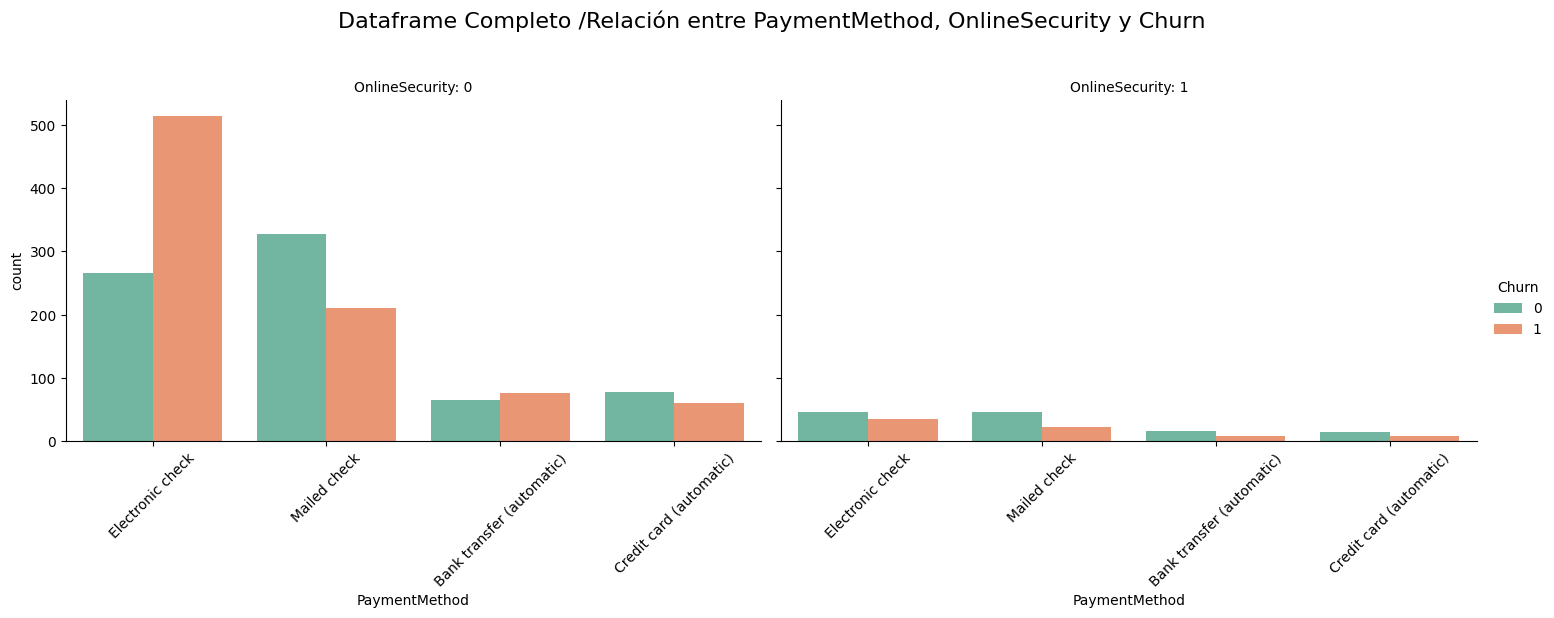

In [152]:
g = sns.catplot(data=df_10, x="PaymentMethod", hue="Churn", col="OnlineSecurity",
                kind="count", height=5, aspect=1.5,
                order=df_10["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("OnlineSecurity: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe Completo /Relación entre PaymentMethod, OnlineSecurity y Churn", fontsize=16)
plt.show()

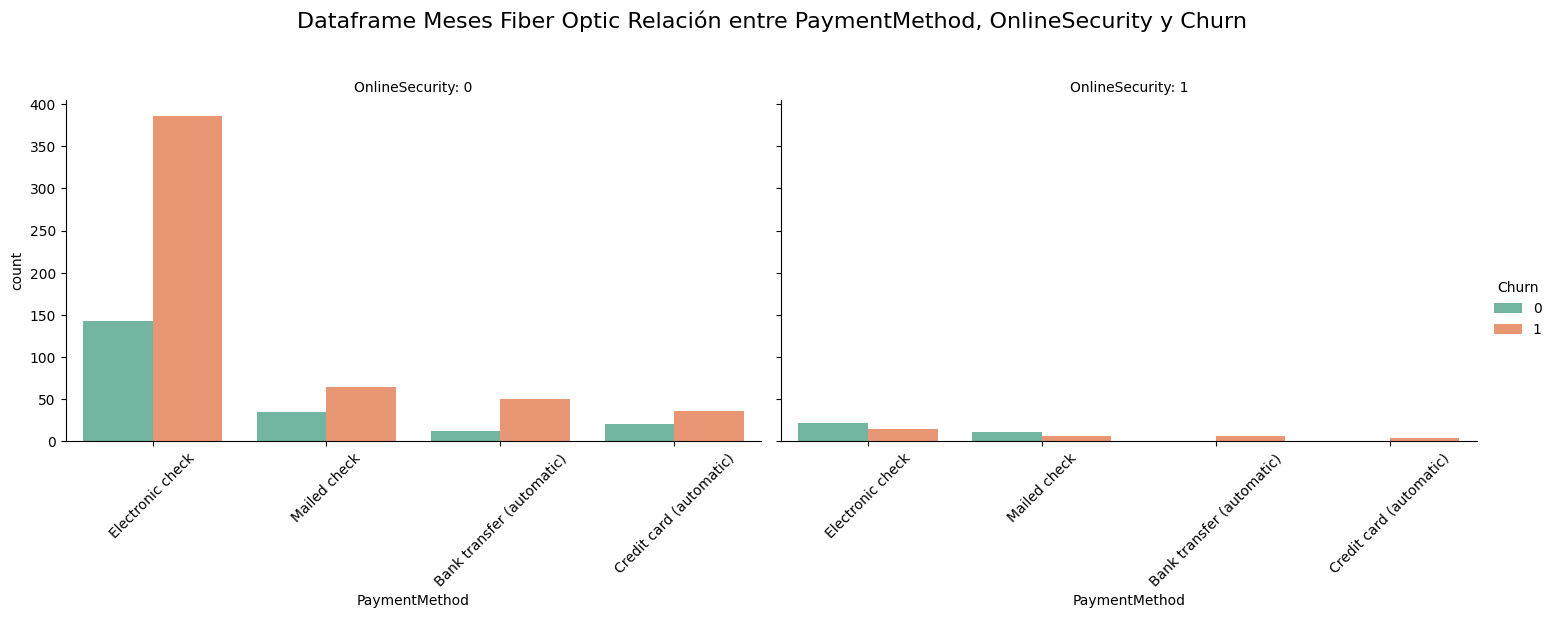

In [153]:
g = sns.catplot(data=df_10[df_10["InternetService"]=="Fiber optic"], x="PaymentMethod", hue="Churn", col="OnlineSecurity",
                kind="count", height=5, aspect=1.5,
                order=df_10["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("OnlineSecurity: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe Meses Fiber Optic Relación entre PaymentMethod, OnlineSecurity y Churn", fontsize=16)
plt.show()

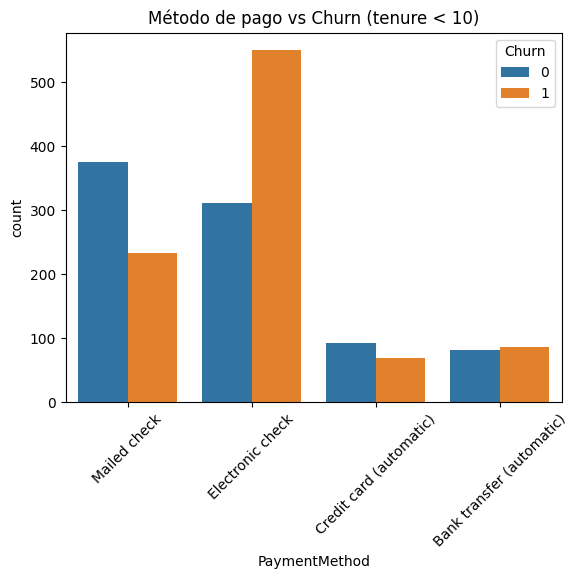

In [99]:
sns.countplot(data=df_10, x="PaymentMethod", hue="Churn")
plt.xticks(rotation=45)
plt.title("Método de pago vs Churn (tenure < 10)")
plt.show()


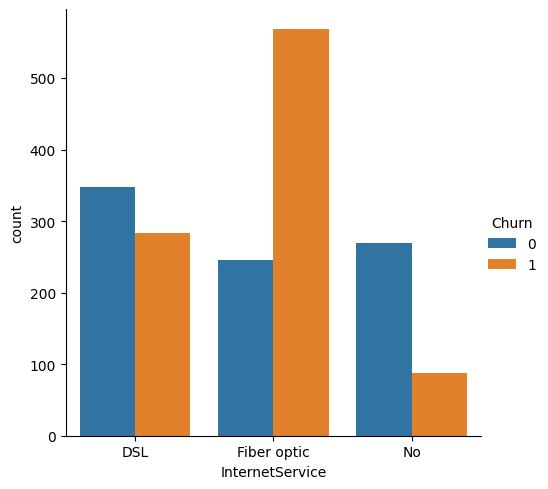

In [100]:
sns.catplot(
    data=df_10, kind="count",
    x="InternetService", hue="Churn",
)

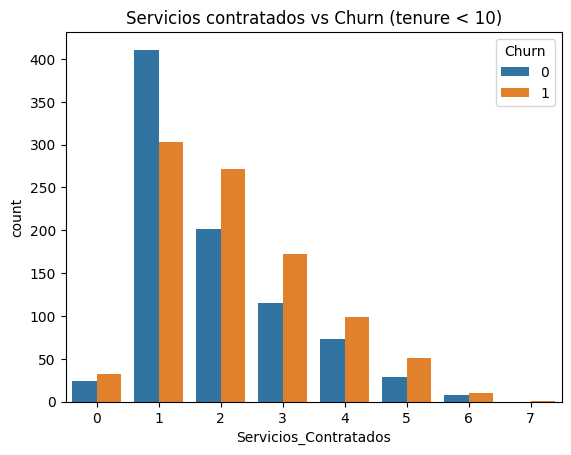

In [101]:
sns.countplot(data=df_10, x="Servicios_Contratados", hue="Churn")
plt.title("Servicios contratados vs Churn (tenure < 10)")
plt.show()


## Evaluando el DataFrame con Tenure < 10 y sin_factor_riesgo


In [154]:
# Churn quitando ese segmento
df_sin_factor_riesgo_10 = df_10[~((df_10['InternetService'] == 'Fiber optic') &
                   (df_10['PaymentMethod'] == 'Electronic check') &
                   (df_10['OnlineSecurity'] == 0))]

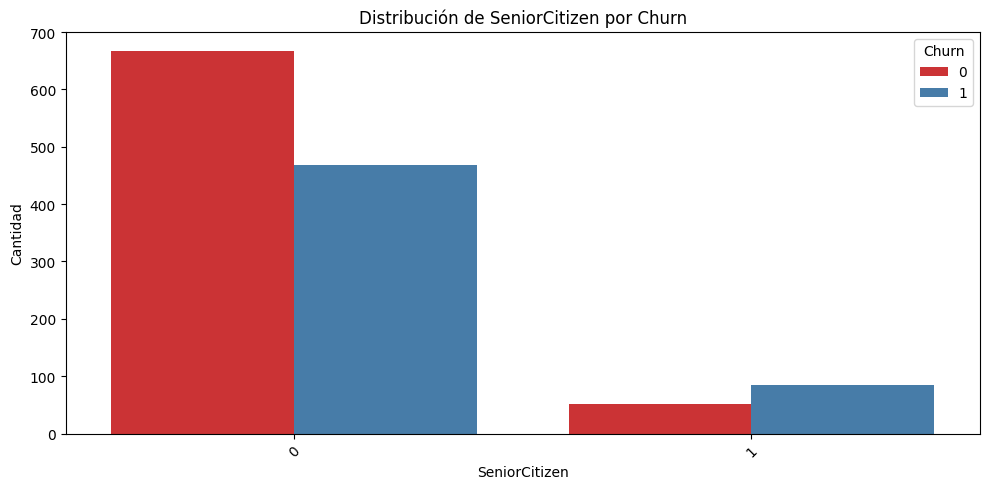

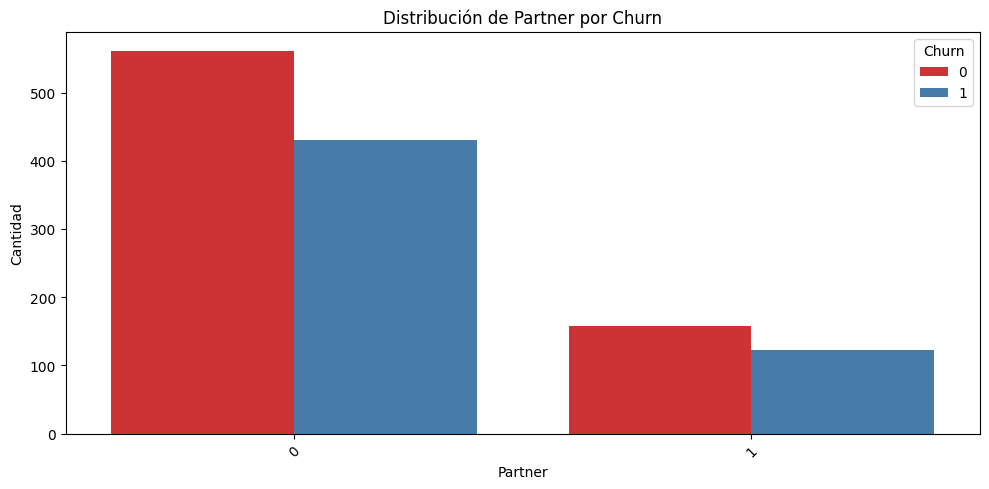

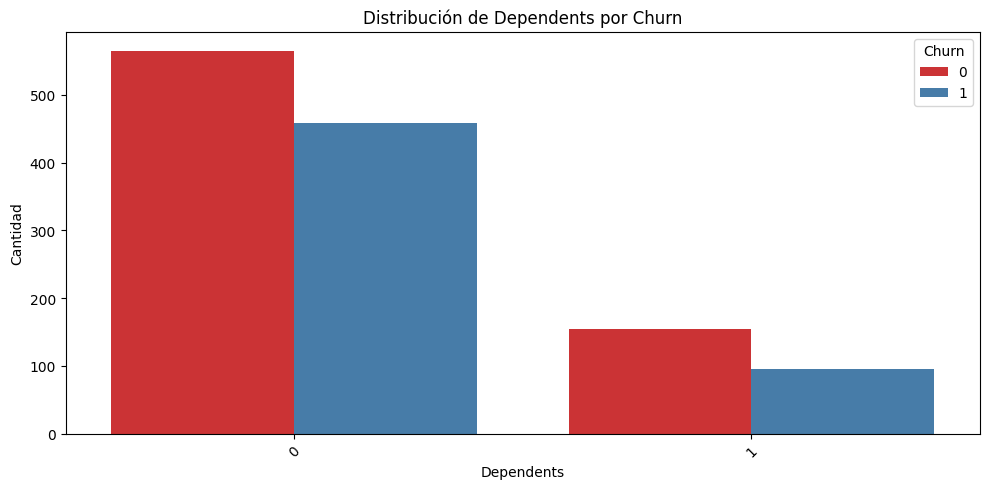

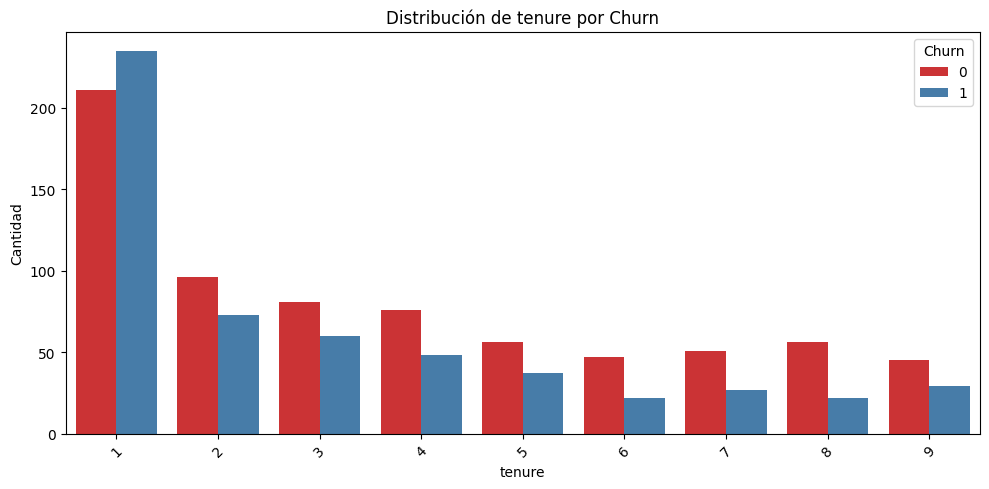

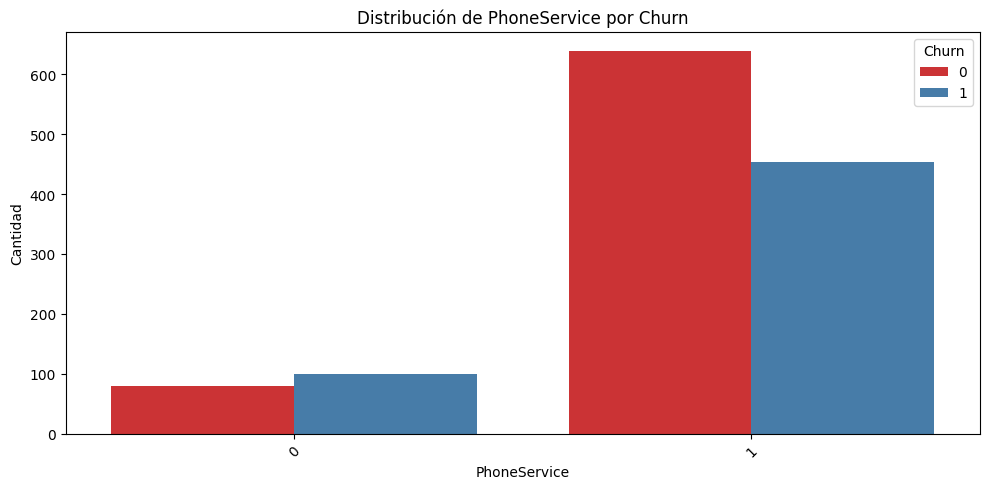

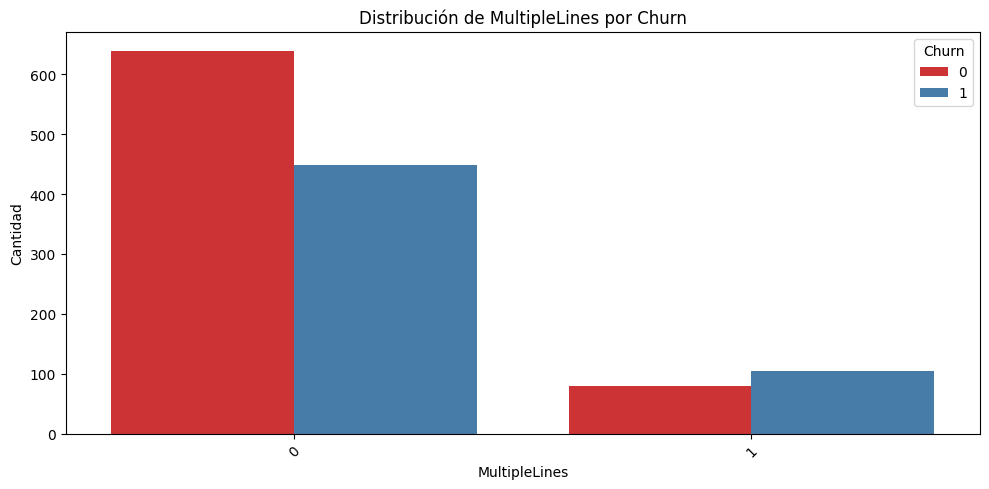

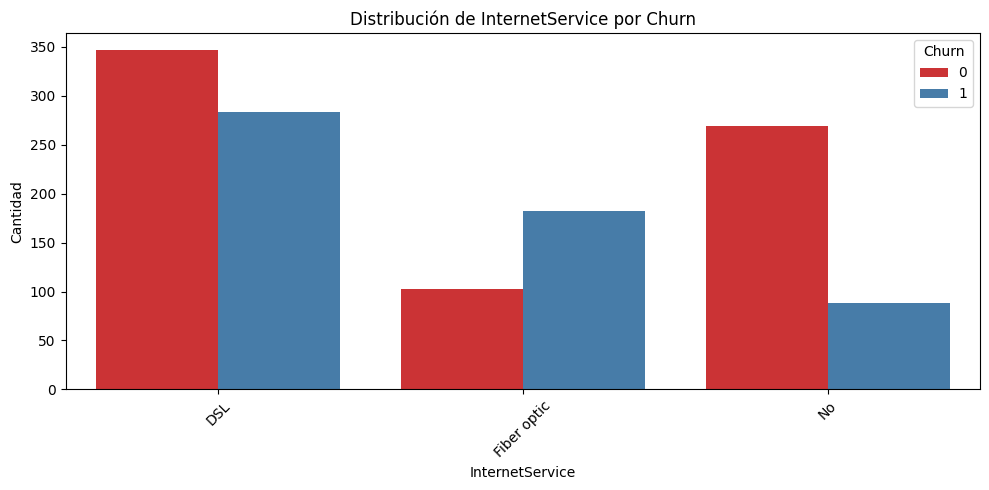

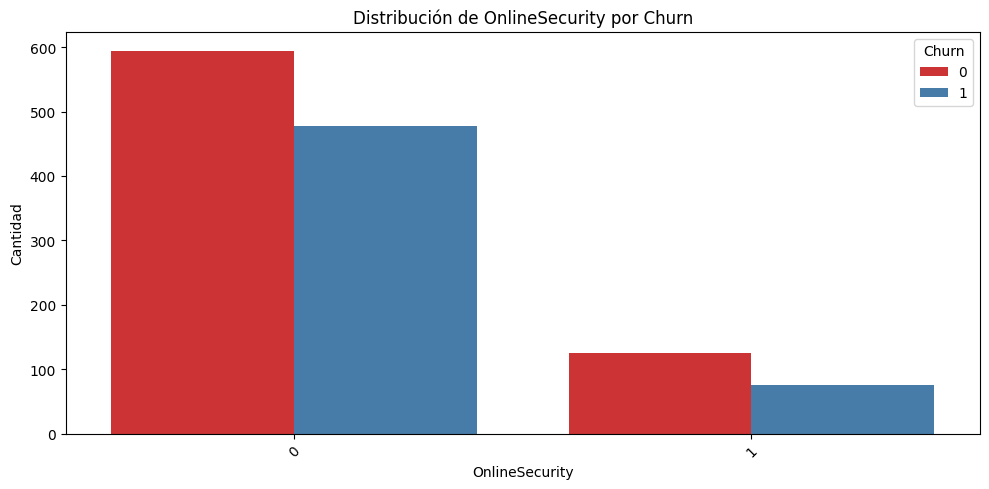

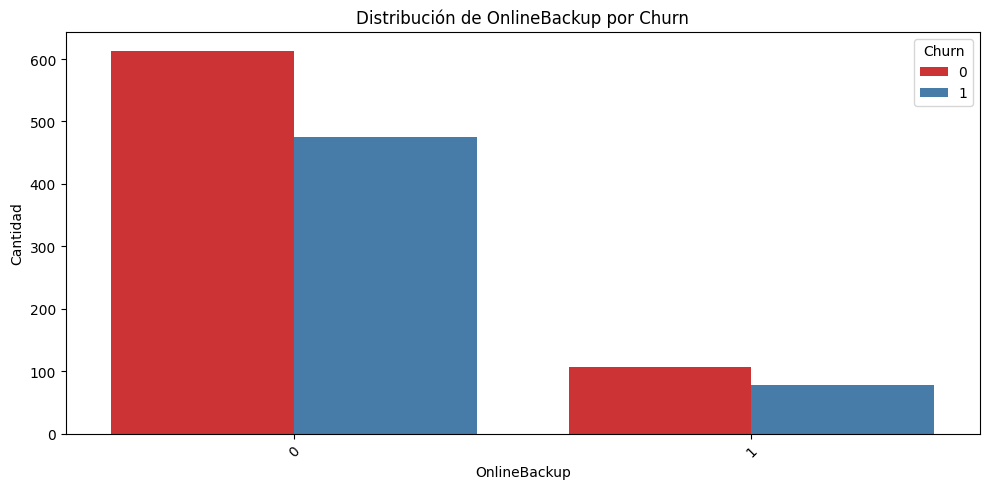

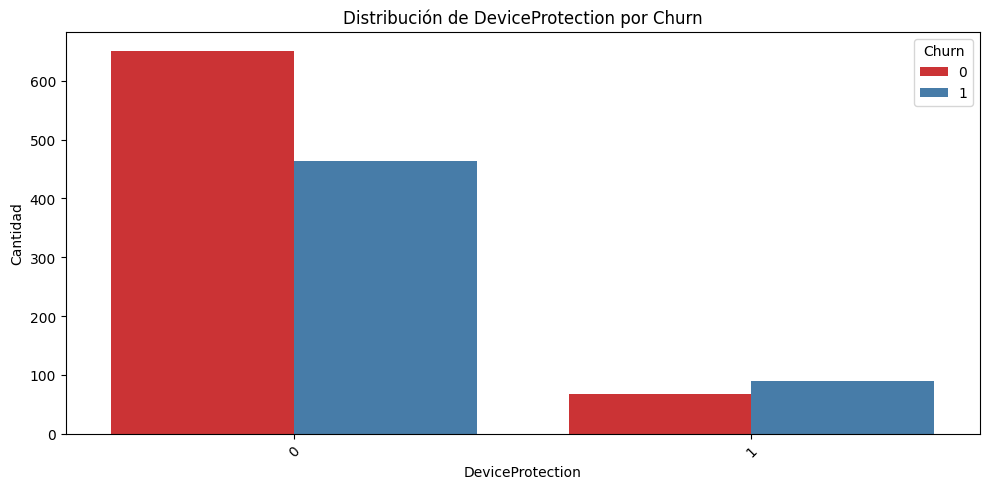

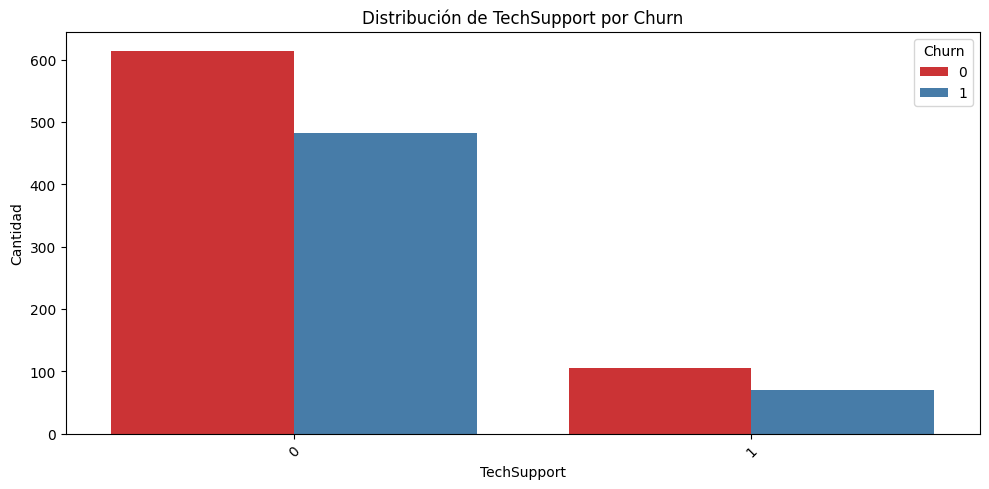

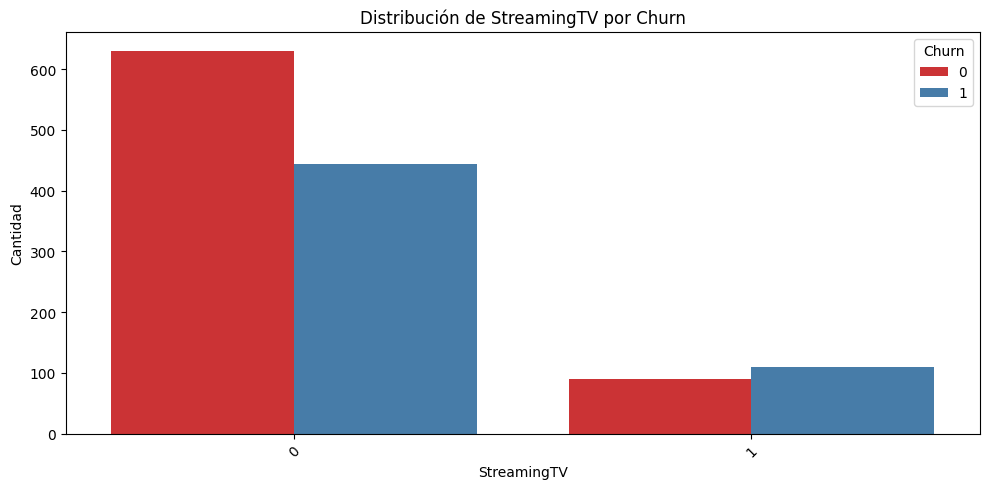

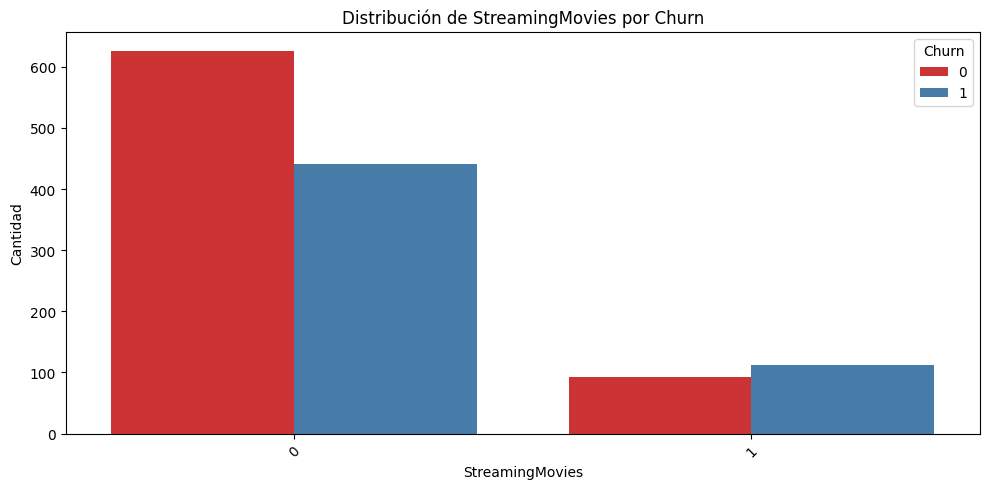

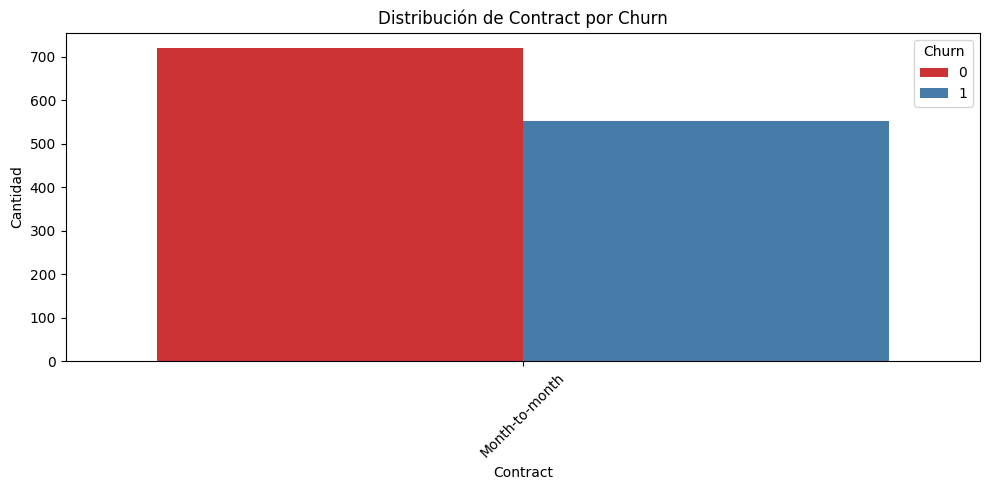

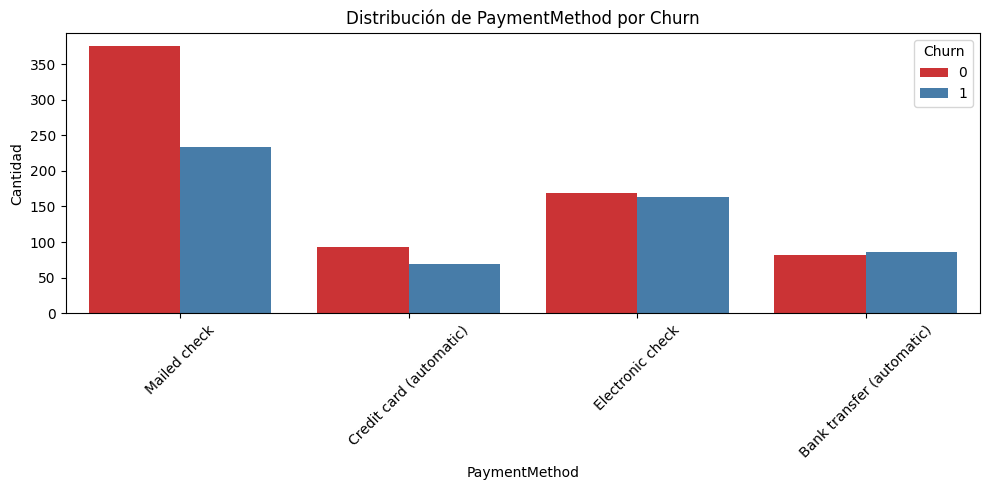

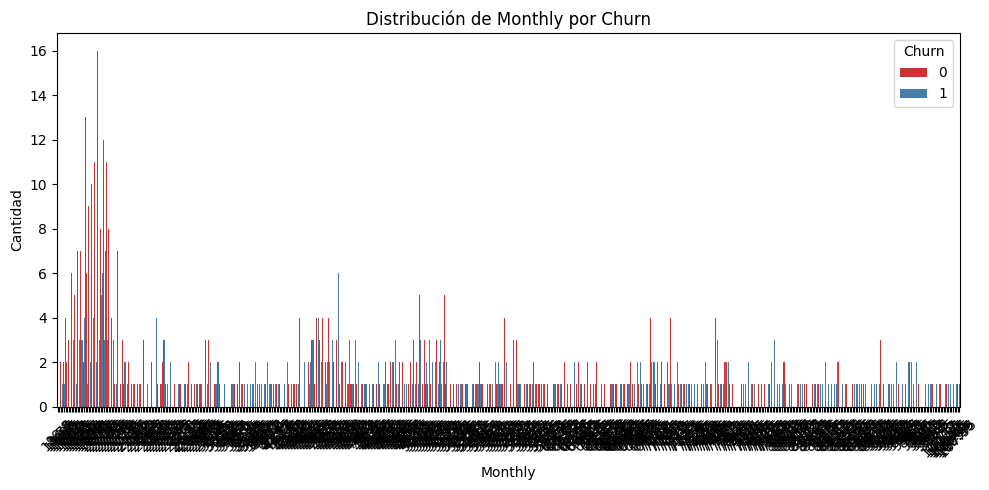

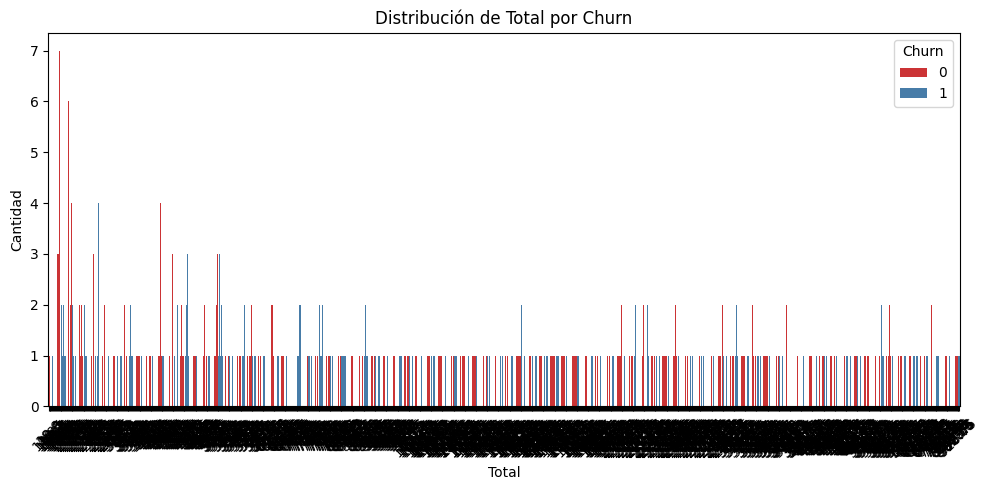

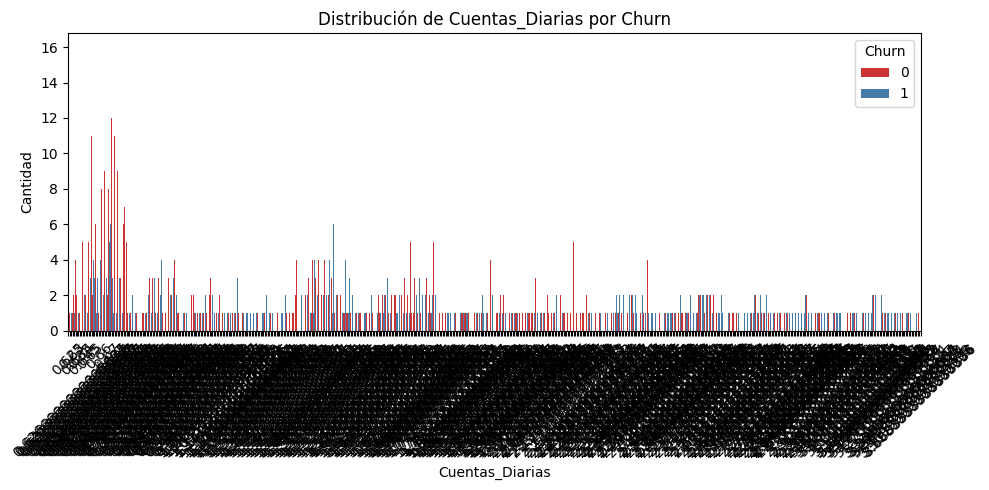

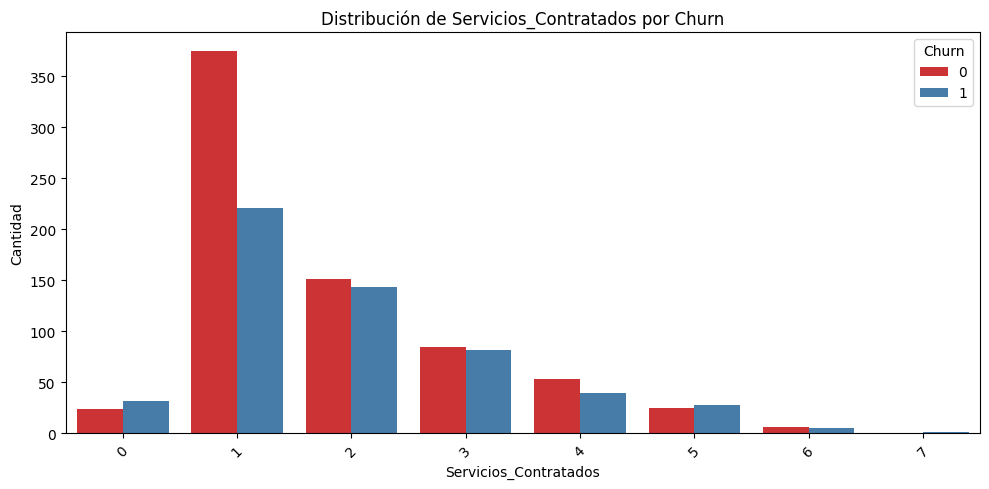

In [168]:
colum = df_sin_factor_riesgo_10.columns.drop("Churn")
for i in colum:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df_sin_factor_riesgo_10[i], hue=df_sin_factor_riesgo_10["Churn"], palette="Set1")
    plt.title(f"Distribución de {i} por Churn")
    plt.xlabel(i)
    plt.ylabel("Cantidad")
    plt.xticks(rotation=45)
    plt.legend(title="Churn")
    plt.tight_layout()
    plt.show()

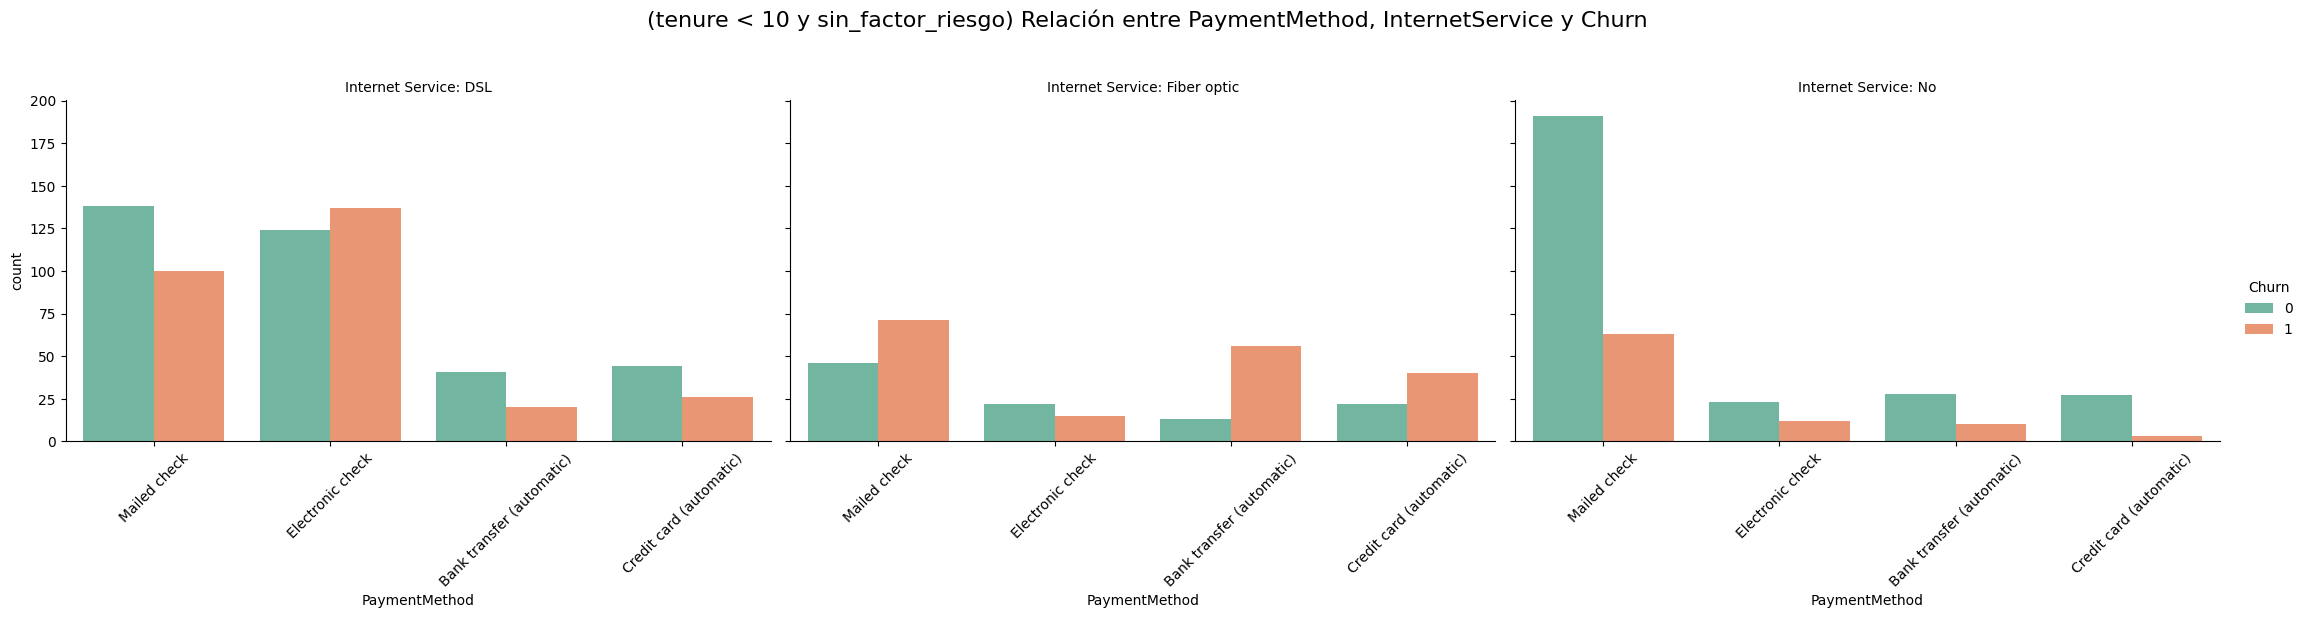

In [165]:
g = sns.catplot(data=df_sin_factor_riesgo_10, x="PaymentMethod", hue="Churn", col="InternetService",
                kind="count", height=5, aspect=1.5,
                order=df_sin_factor_riesgo_10["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("Internet Service: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("(tenure < 10 y sin_factor_riesgo) Relación entre PaymentMethod, InternetService y Churn", fontsize=16)
plt.show()

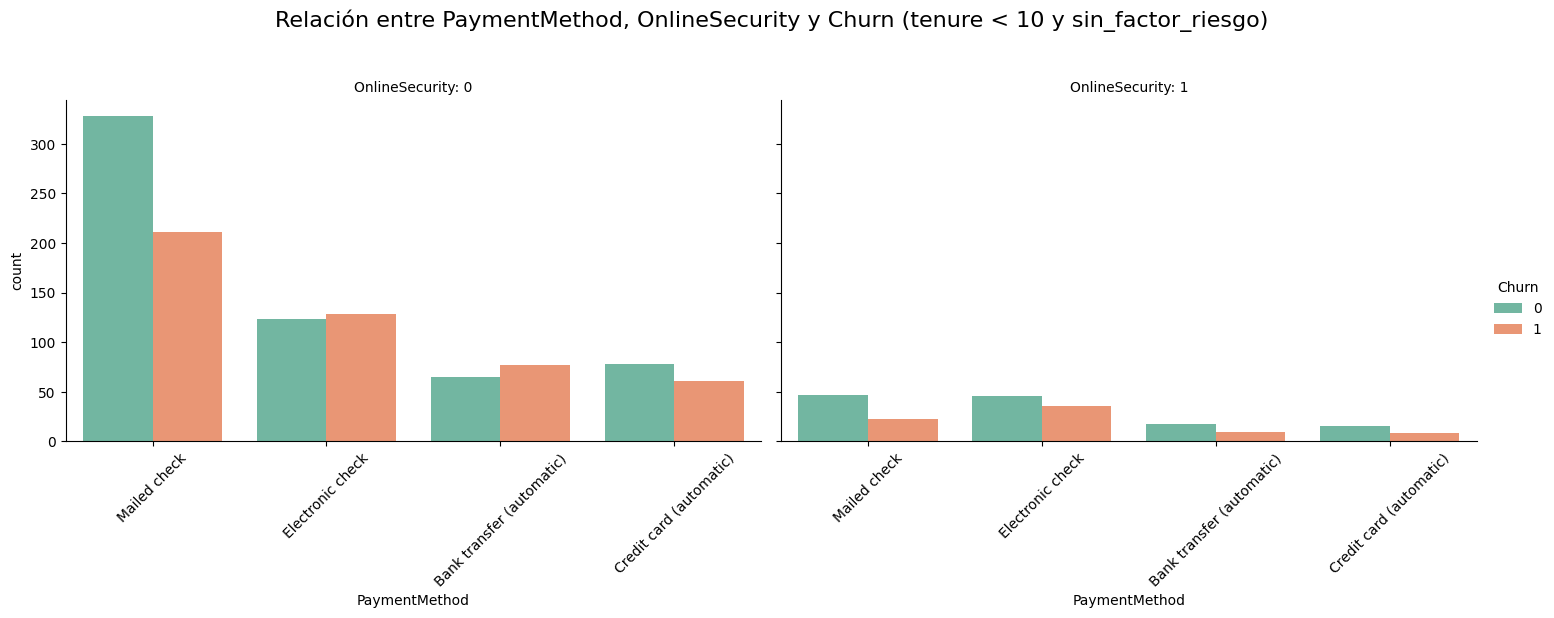

In [164]:
g = sns.catplot(data=df_sin_factor_riesgo_10, x="PaymentMethod", hue="Churn", col="OnlineSecurity",
                kind="count", height=5, aspect=1.5,
                order=df_sin_factor_riesgo_10["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("OnlineSecurity: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Relación entre PaymentMethod, OnlineSecurity y Churn (tenure < 10 y sin_factor_riesgo)", fontsize=16)
plt.show()

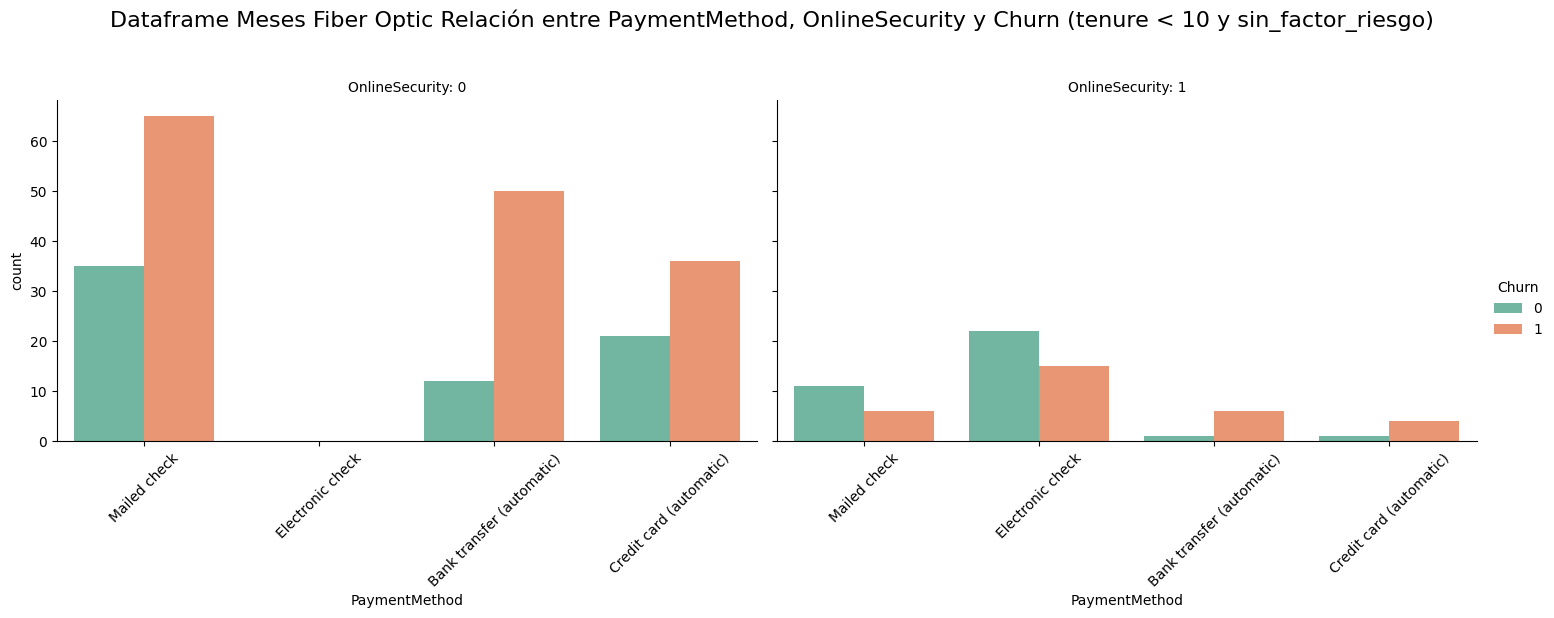

In [162]:
g = sns.catplot(data=df_sin_factor_riesgo_10[df_sin_factor_riesgo_10["InternetService"]=="Fiber optic"], x="PaymentMethod", hue="Churn", col="OnlineSecurity",
                kind="count", height=5, aspect=1.5,
                order=df_sin_factor_riesgo_10["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("OnlineSecurity: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe Meses Fiber Optic Relación entre PaymentMethod, OnlineSecurity y Churn (tenure < 10 y sin_factor_riesgo)", fontsize=16)
plt.show()

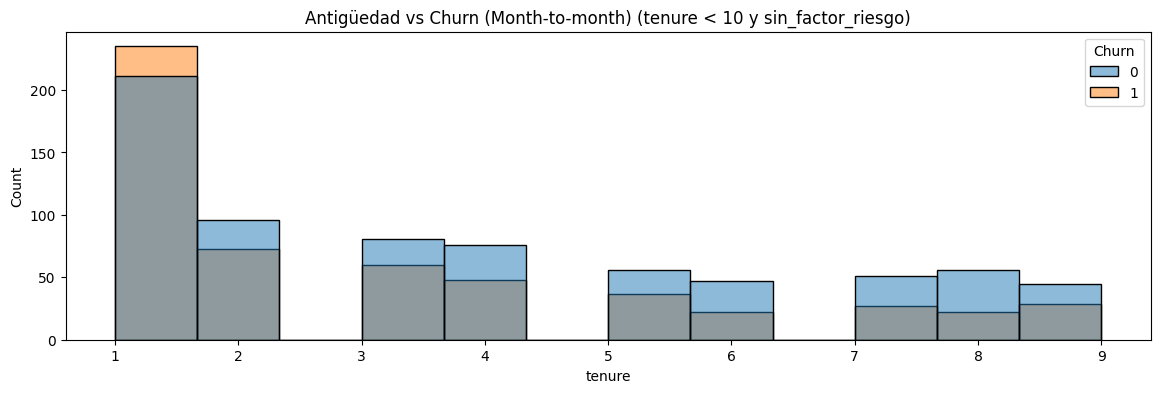

In [161]:
plt.figure(figsize=(14, 4))
sns.histplot(data=df_sin_factor_riesgo_10, x="tenure", hue="Churn")
plt.title("Antigüedad vs Churn (Month-to-month) (tenure < 10 y sin_factor_riesgo)")
plt.show()


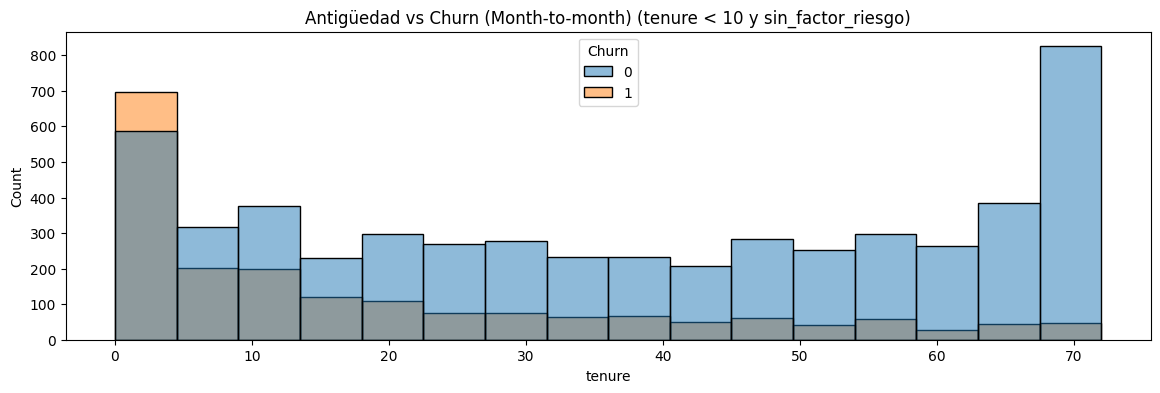

In [170]:
plt.figure(figsize=(14, 4))
sns.histplot(data=df, x="tenure", hue="Churn")
plt.title("Antigüedad vs Churn (Month-to-month) (tenure < 10 y sin_factor_riesgo)")
plt.show()

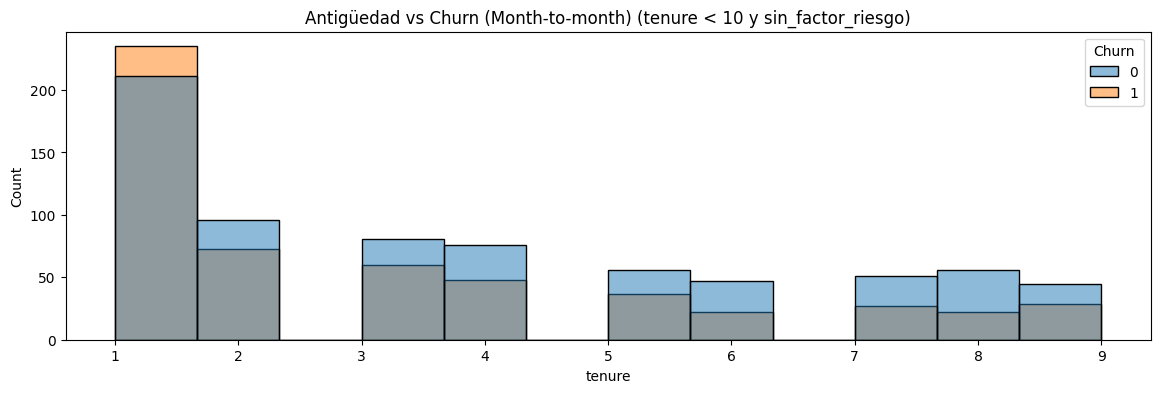

In [213]:
plt.figure(figsize=(14, 4))
sns.histplot(data=df_sin_factor_riesgo_10, x="tenure", hue="Churn")
plt.title("Antigüedad vs Churn (Month-to-month) (tenure < 10 y sin_factor_riesgo)")
plt.show()

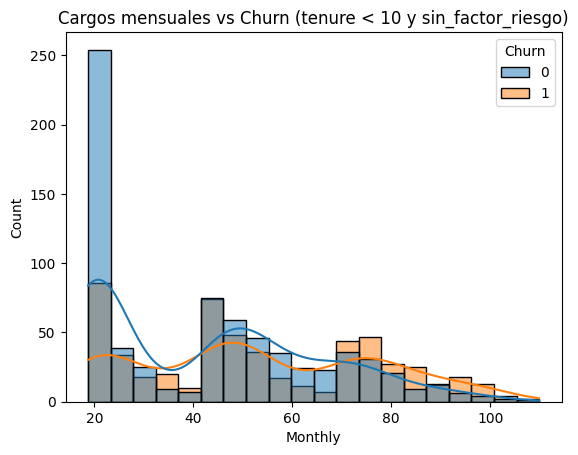

In [160]:
sns.histplot(data=df_sin_factor_riesgo_10, x="Monthly", hue="Churn", bins=20, kde=True)
plt.title("Cargos mensuales vs Churn (tenure < 10 y sin_factor_riesgo)")
plt.show()


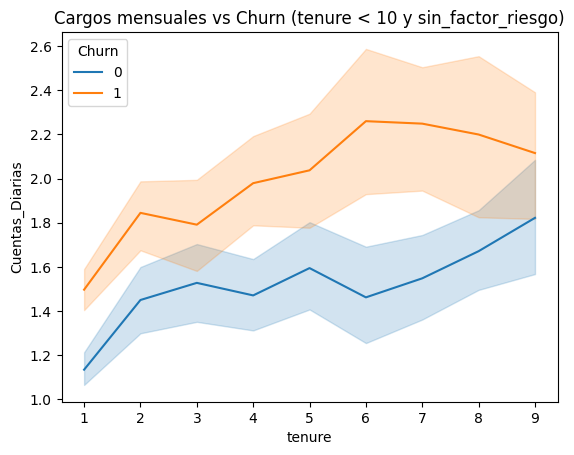

In [181]:
sns.lineplot(data=df_sin_factor_riesgo_10, y="Cuentas_Diarias",x="tenure", hue="Churn")
plt.title("Cargos mensuales vs Churn (tenure < 10 y sin_factor_riesgo)")
plt.show()

## Planteamiento de Hipotesis

### Se tiene la hipotesis de que al no tener seguridad se pudieron robar el pago de cheque y de igual manera que fallo el servicio de internet por Fiber optic, y por eso no se efectuaron los pagos y los conto como abandono

In [69]:
from scipy.stats import chi2_contingency

tabla = pd.crosstab(df['PaymentMethod'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(tabla)

print(f"Chi-cuadrado: {chi2}, p-valor: {p}")


Chi-cuadrado: 629.5835033393546, p-valor: 3.8889665616393124e-136


In [206]:
df_m["Churn"].mean()

np.float64(0.42347066167290887)

In [207]:
df_m[(df_m['InternetService'] == 'Fiber optic') &
            (df_m['PaymentMethod'] == 'Electronic check') &
            (df_m['OnlineSecurity'] == 0)]['Churn'].mean()

np.float64(0.6208368915456874)

In [ ]:
df_10[(df_10['InternetService'] == 'Fiber optic') &
            (df_10['PaymentMethod'] == 'Electronic check') &
            (df_10['OnlineSecurity'] == 0)]['Churn'].mean()


np.float64(0.7296786389413988)

In [ ]:
df_10['Churn'].mean()


np.float64(0.5213770127706829)

In [72]:
df["Churn"].mean()

np.float64(0.26613458098252374)

In [73]:
df[(df['InternetService'] == 'Fiber optic') &
            (df['PaymentMethod'] == 'Electronic check') &
            (df['OnlineSecurity'] == 0)]['Churn'].mean()

np.float64(0.5711111111111111)

In [212]:
churn_mean = [0.26613458098252374,0.5711111111111111,0.6208368915456874,0.42347066167290887,0.5213770127706829,0.7296786389413988]
descripcion = ["DataFrame completo","Factores de Riesgo","DataFrame M-M","DataFrame M-M(solo_factor_riesgo)","DataFrame M-M (tenure < 10)","DataFrame M-M (tenure < 10 y factor_riesgo)"]
df_churn_mean = pd.DataFrame({
    'Descripción': descripcion,
    'Churn Mean': churn_mean
})
df_churn_mean

Descripción  Churn Mean
0                           DataFrame completo    0.266135
1                           Factores de Riesgo    0.571111
2                                DataFrame M-M    0.620837
3            DataFrame M-M(solo_factor_riesgo)    0.423471
4                  DataFrame M-M (tenure < 10)    0.521377
5  DataFrame M-M (tenure < 10 y factor_riesgo)    0.729679

### "Detectamos que los clientes con menos de 10 meses de antigüedad, que usan Internet por fibra óptica, pagan mediante cheque electrónico, y no tienen seguridad en línea, presentan una tasa de churn del 73%, muy por encima del 52% general. Esto sugiere una posible combinación de factores críticos relacionados con la percepción de riesgo, problemas técnicos o fallas de pago."

In [74]:
# Churn general original
churn_total = df['Churn'].mean()
churn_total

np.float64(0.26613458098252374)

In [75]:
# Churn quitando ese segmento
df_sin_factor_riesgo = df[~((df['InternetService'] == 'Fiber optic') &
                   (df['PaymentMethod'] == 'Electronic check') &
                   (df['OnlineSecurity'] == 0))]

churn_filtrado = df_sin_factor_riesgo['Churn'].mean()
churn_filtrado

np.float64(0.19655230691228665)

<Axes: xlabel='tenure', ylabel='Monthly'>

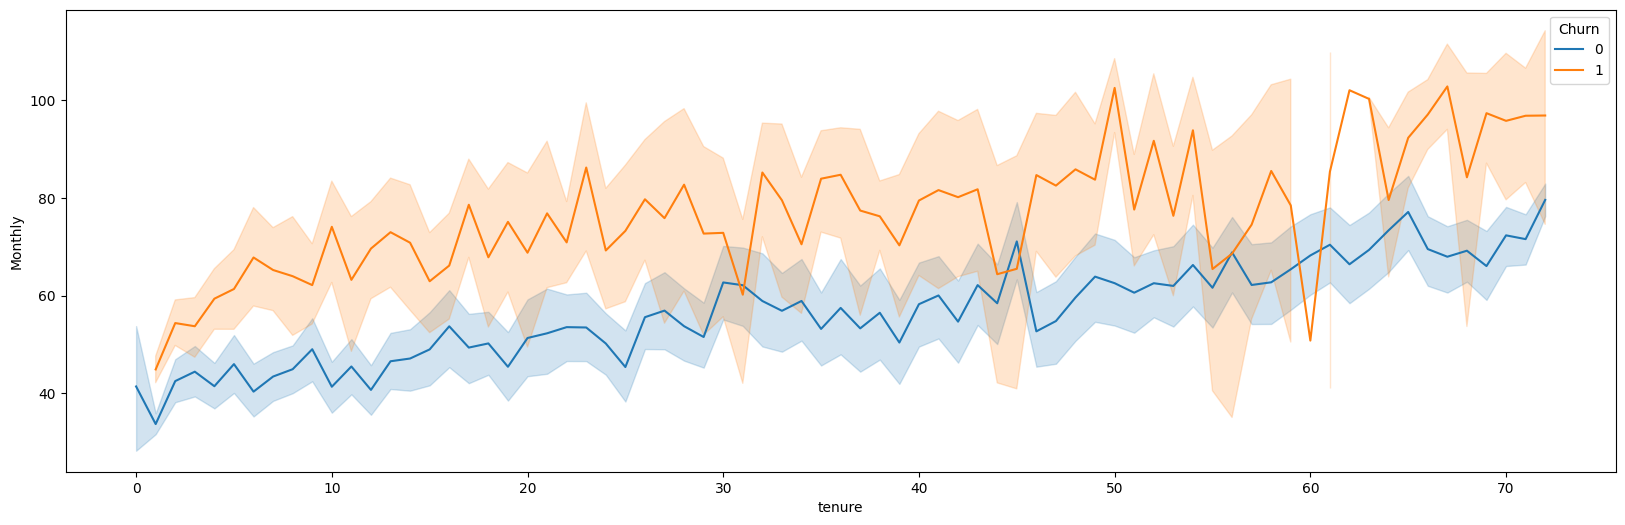

In [122]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="tenure", y="Monthly", hue="Churn", data=df_sin_factor_riesgo)

## Analisis de tenure > 10 y sin_factor_riesgo

In [167]:
df["Churn"].mean()

np.float64(0.26613458098252374)

In [76]:
# Churn quitando tenure < 10
df_sin_nuevos = df[df['tenure'] >= 10]
churn_sin_nuevos = df_sin_nuevos['Churn'].mean()
churn_sin_nuevos

np.float64(0.18483146067415732)

In [77]:
df_sin_nuevos_y_factor_riesgo = df_sin_factor_riesgo[df_sin_factor_riesgo['tenure'] >= 10]
churn_sin_nuevos2 = df_sin_nuevos_y_factor_riesgo['Churn'].mean()
churn_sin_nuevos2

np.float64(0.1333775713337757)

<Axes: xlabel='tenure', ylabel='Monthly'>

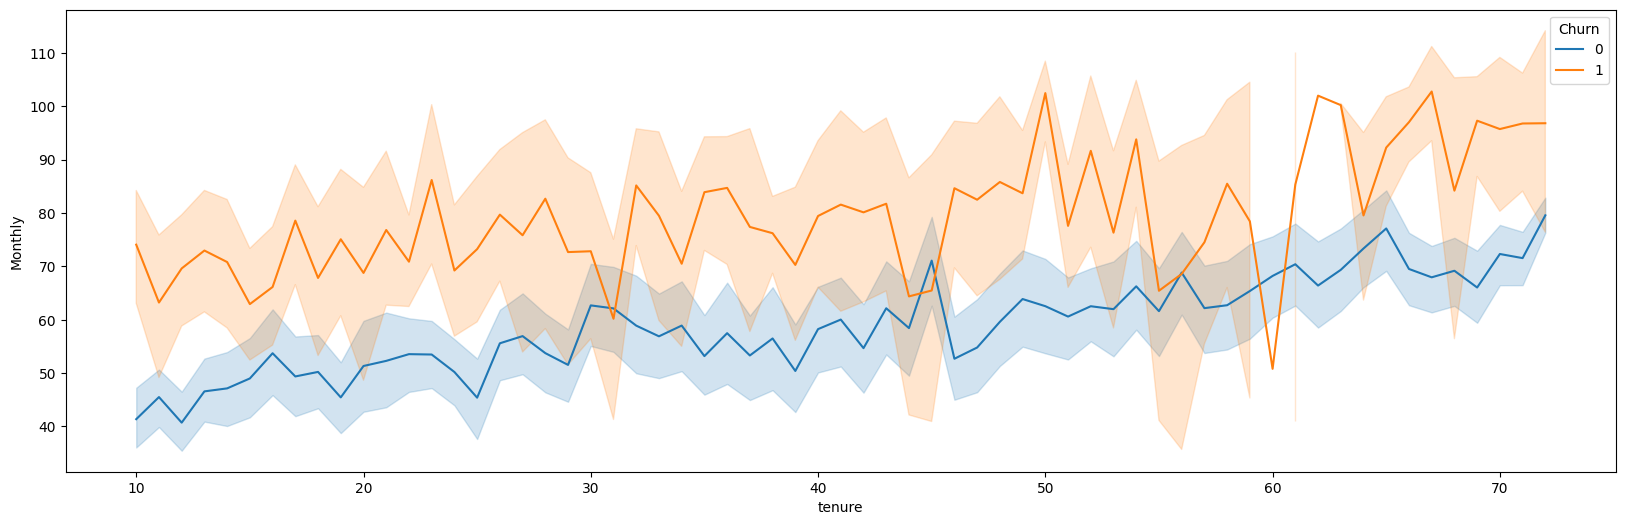

In [79]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="tenure", y="Monthly", hue="Churn", data=df_sin_nuevos_y_factor_riesgo)

# Reporte Final

### Podemos observar que en general los clientes que mas pagan son los que mas abandonan

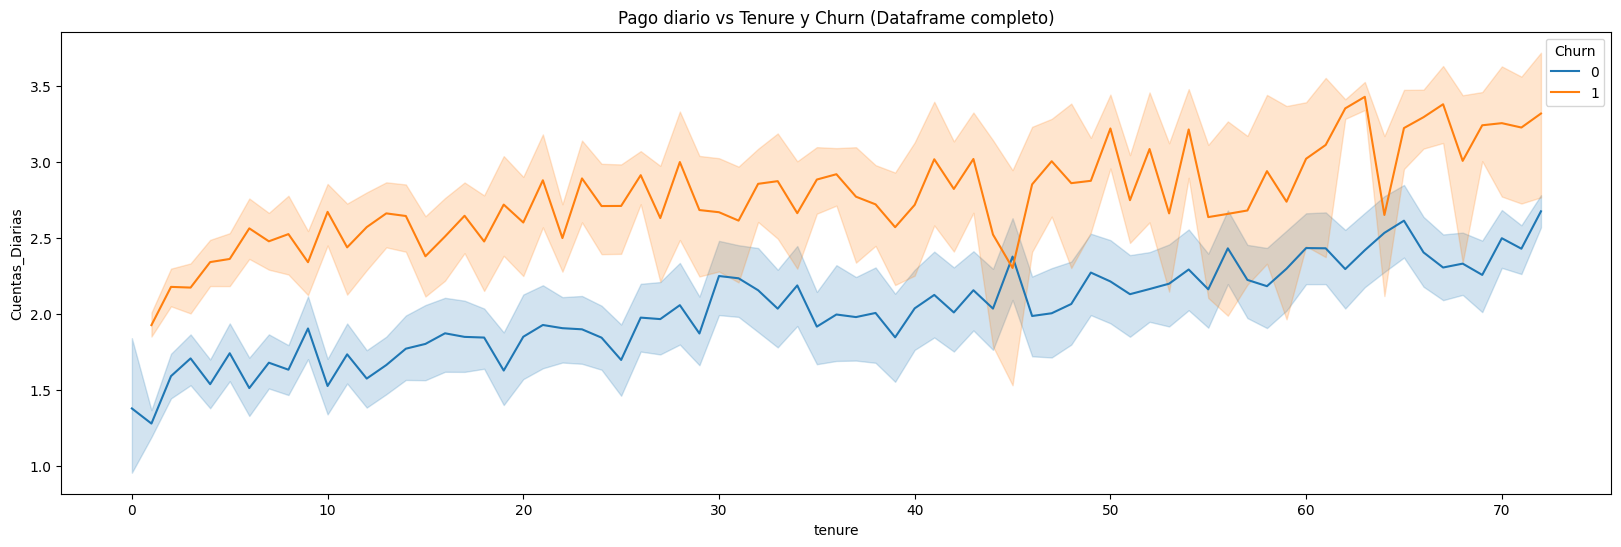

In [186]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="tenure", y="Cuentas_Diarias", hue="Churn", data=df)
plt.title("Pago diario vs Tenure y Churn (Dataframe completo)")
plt.show()

### Tambien podemos observar que la mayor cantidad de clientes que han abandonado tenian un contrato Month-to-Month

Text(0.5, 1.0, 'Churn vs Cuentas Diarias en tipos de contrato')

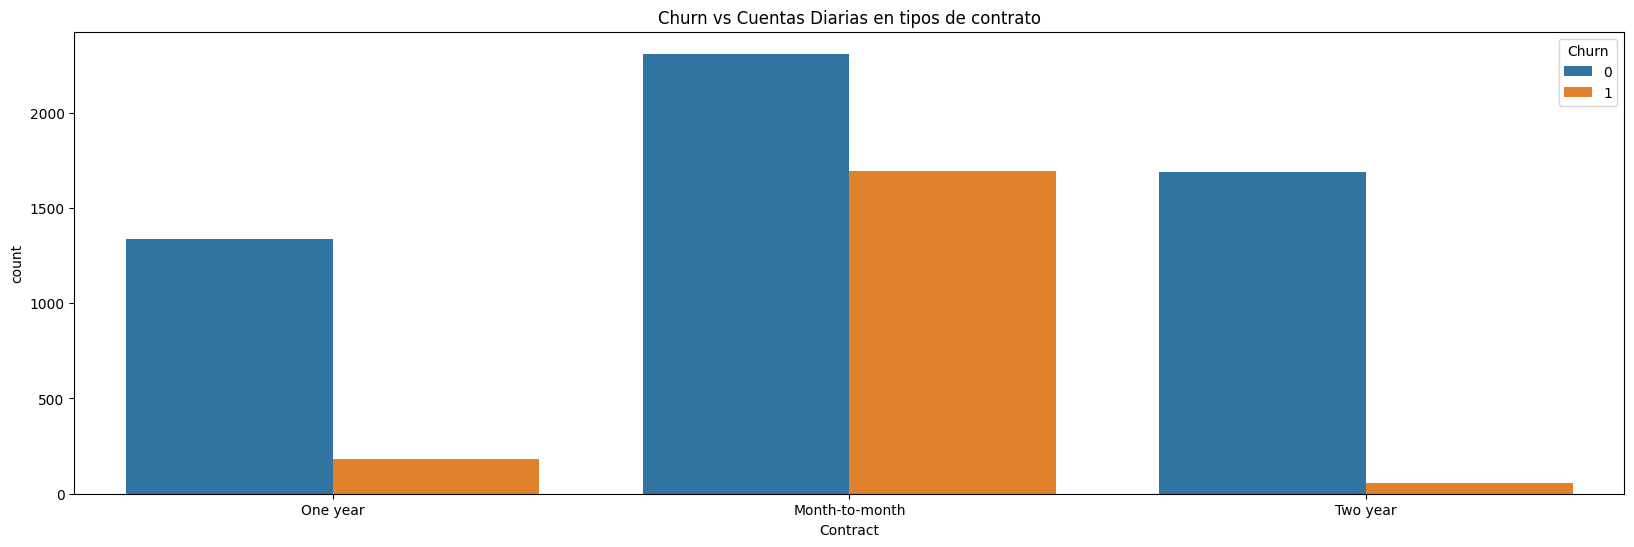

In [187]:
plt.figure(figsize=(20, 6))
sns.countplot(x="Contract",  hue="Churn", data=df)
plt.title("Churn vs Cuentas Diarias en tipos de contrato")

### Al explorar la relacion entre abandono y antiguedad podemos observar que los clientes nuevos son los que mas han abandonado

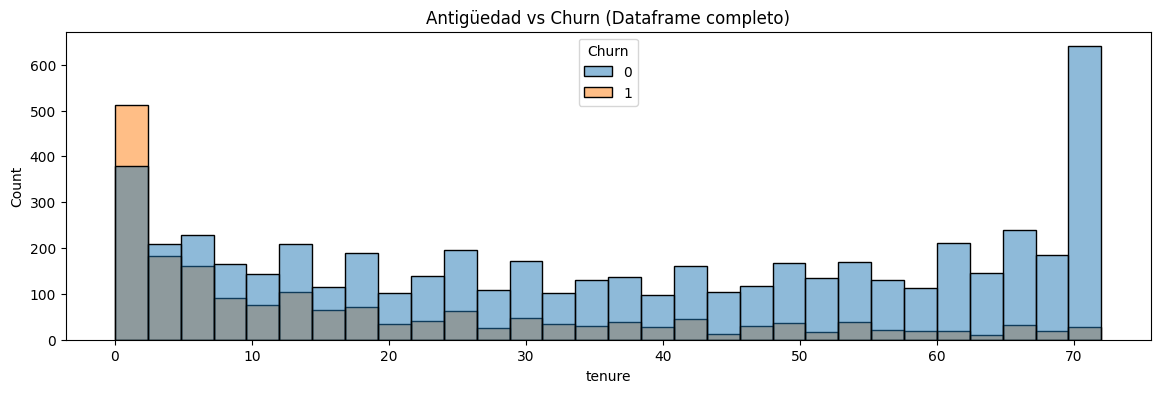

In [191]:
plt.figure(figsize=(14, 4))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30)
plt.title("Antigüedad vs Churn (Dataframe completo)")
plt.show()

### Se creo una columna que cuente el numero de servicios contratados que tenia el cliente, para evaluar si esto tenia relacion con el Abandono

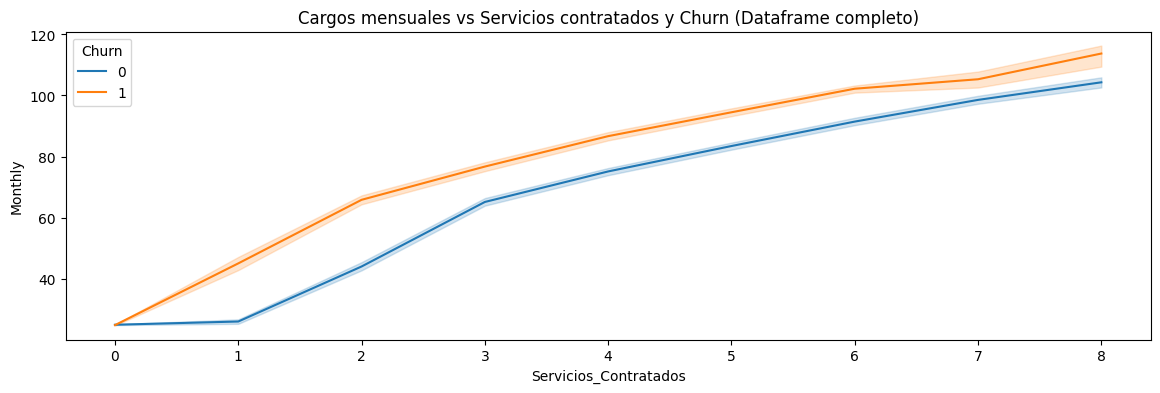

In [200]:
plt.figure(figsize=(14, 4))
sns.lineplot(data=df,y="Monthly",x="Servicios_Contratados",hue="Churn")
plt.title("Cargos mensuales vs Servicios contratados y Churn (Dataframe completo)")
plt.show()

### Al seguir investigando en las demas categorias notamos que algunas muestran una relacion y son mas propensas al Abandono

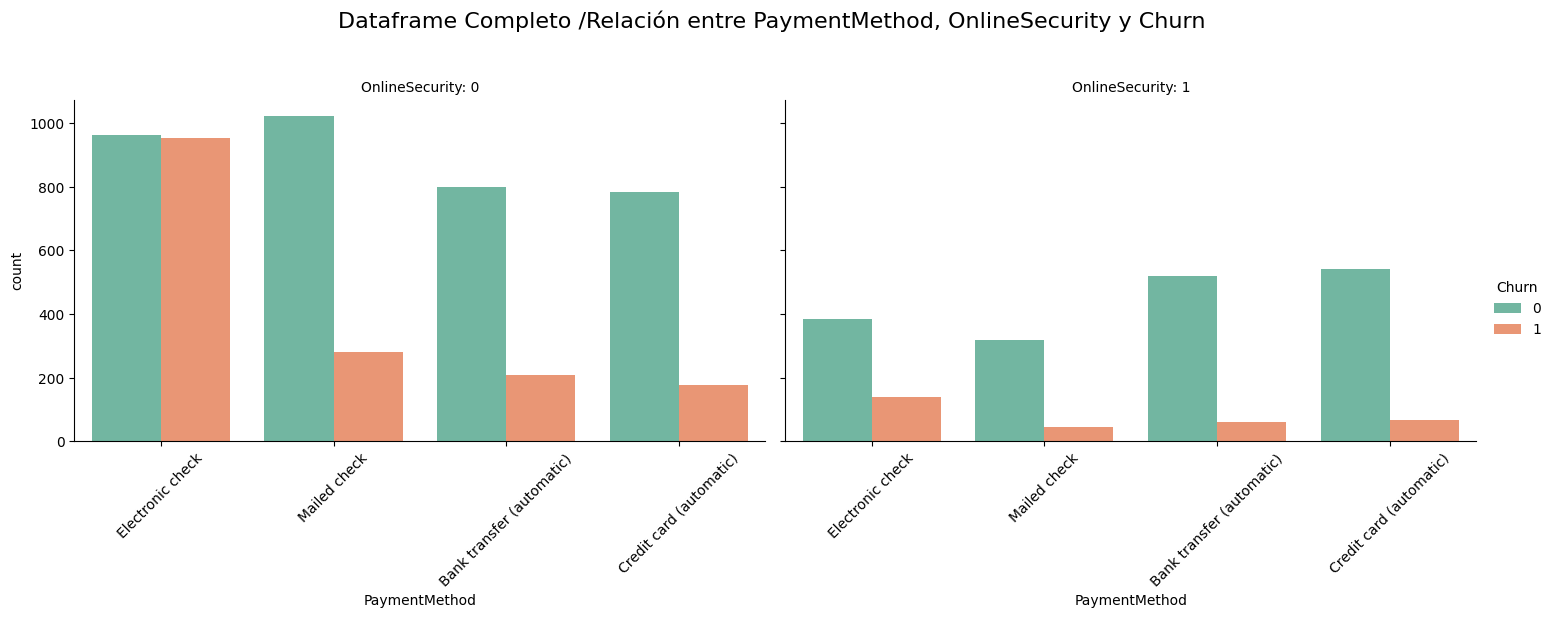

In [192]:
g = sns.catplot(data=df, x="PaymentMethod", hue="Churn", col="OnlineSecurity",
                kind="count", height=5, aspect=1.5,
                order=df["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("OnlineSecurity: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe Completo /Relación entre PaymentMethod, OnlineSecurity y Churn", fontsize=16)
plt.show()

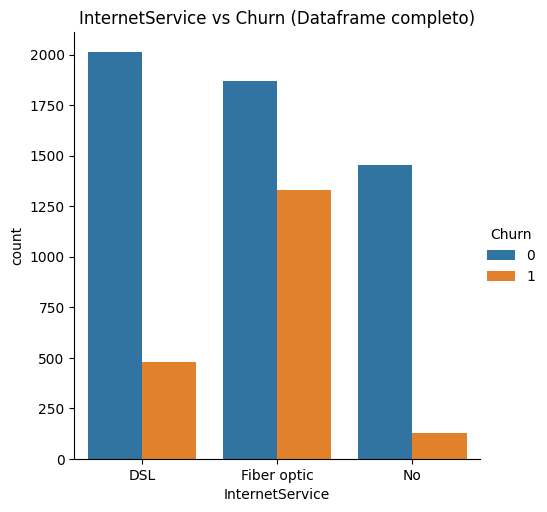

In [193]:
sns.catplot(
    data=df, kind="count",
    x="InternetService", hue="Churn",
)
plt.title("InternetService vs Churn (Dataframe completo)")
plt.show()

### Como es normal se sabe que entre mas antiguedad tiene un cliente es menos probable que abandone por lo cual decidimos reducir el DataFrame a clientes con antiguedad menor a 10 meses para poder observar mejor que esta pasando

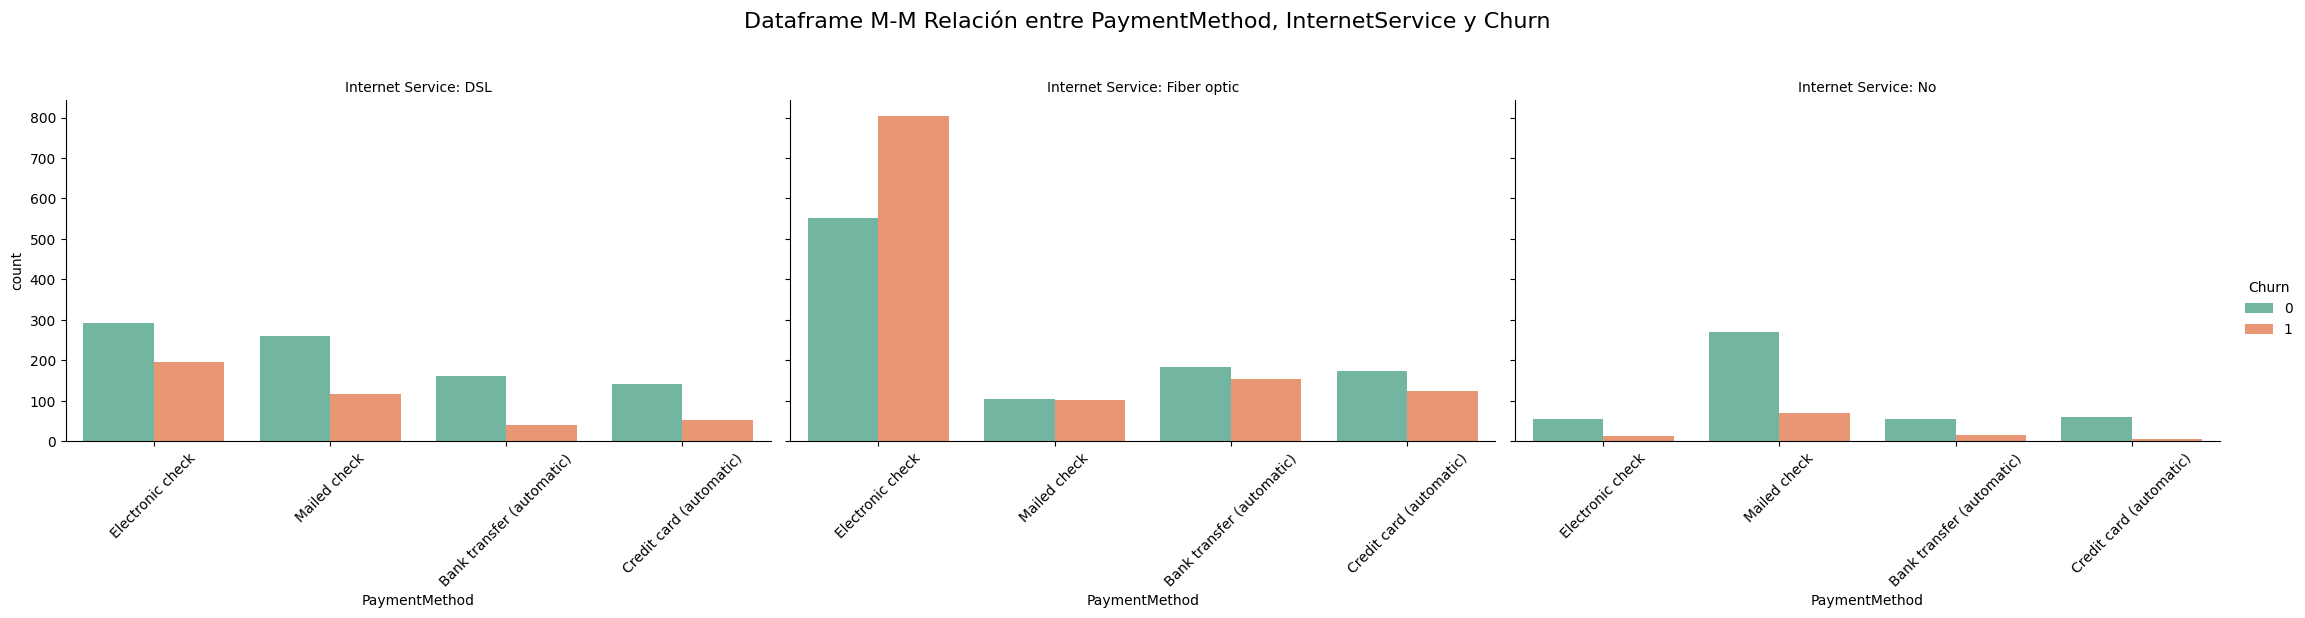

In [201]:
g = sns.catplot(data=df_m, x="PaymentMethod", hue="Churn", col="InternetService",
                kind="count", height=5, aspect=1.5,
                order=df_m["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("Internet Service: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe M-M Relación entre PaymentMethod, InternetService y Churn", fontsize=16)
plt.show()

### Podemos Observar que existe una gran relacion entre las personas que utilizaban el PaymentMethod de "Electronic Check" y las que tenian de Internet Service "Fiber opctic" por lo cual decidimos evaluar tambien la relacion con OnlineSecurity

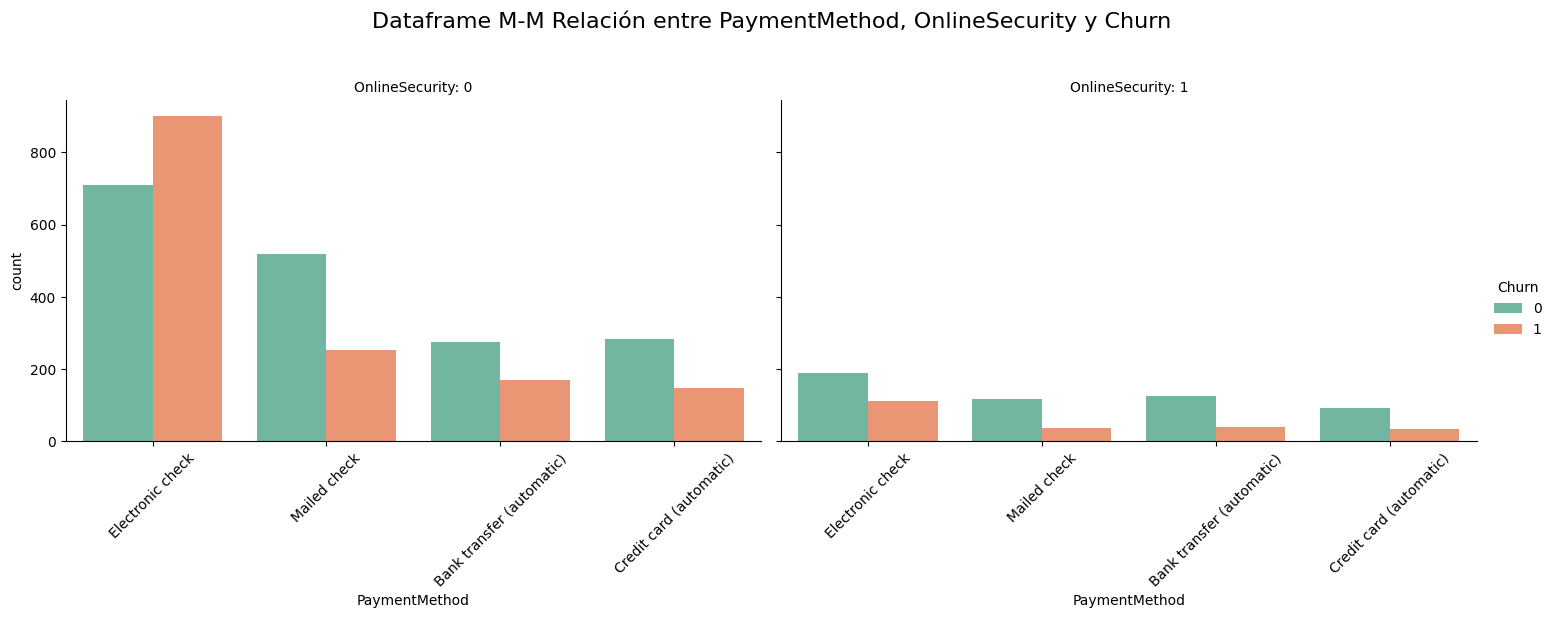

In [202]:
g = sns.catplot(data=df_m, x="PaymentMethod", hue="Churn", col="OnlineSecurity",
                kind="count", height=5, aspect=1.5,
                order=df_m["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("OnlineSecurity: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe M-M Relación entre PaymentMethod, OnlineSecurity y Churn", fontsize=16)
plt.show()

### Decidimos profundizar en los clientes que tenian contratado en InternetService "Fiber optic", lo cual nos permite entender que el patron en el churn por PaymentMethod sigue siendo el mismo

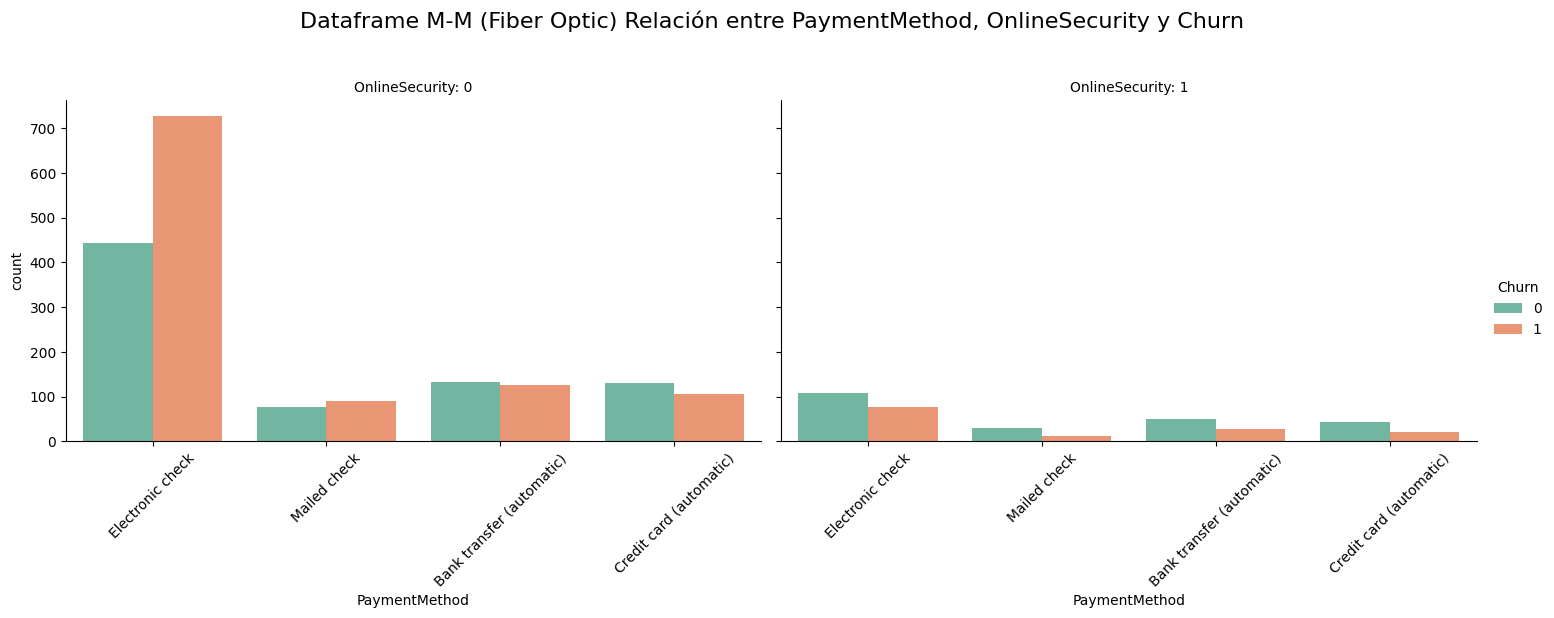

In [205]:
g = sns.catplot(data=df_m[df_m["InternetService"]=="Fiber optic"], x="PaymentMethod", hue="Churn", col="OnlineSecurity",
                kind="count", height=5, aspect=1.5,
                order=df_m["PaymentMethod"].value_counts().index,
                 palette="Set2")

g.set_xticklabels(rotation=45)
g.set_titles("OnlineSecurity: {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Dataframe M-M (Fiber Optic) Relación entre PaymentMethod, OnlineSecurity y Churn", fontsize=16)
plt.show()

## Planteamiento de Hipotesis

### Se plantea la hipotesis de un Factor de Riesgo el cual consiste en que los clientes que contengan las siguientes tres caracteristicas son mas propensos a Abandonar
1. InternetService "Fiber optic"
2. PaymentMethod de "Electronic Check"
3. OnlineSecurity = 0

### Para comprobar esto se realizo el calculo de la media de churn en los diferentes DataFrames que hemos realizado hasta el momento. Podemos observar que del total de clientes en el DataFrame completo solo el 26.6% ha abandonado, al filtrar por los factores de riesgo obtenemos que el 57% de los abandonos son explicados por este filtro. 
### Al calcular la media del DataFrame con solo clientes con contrato Month-to-Month obtenemos que el 62% de estos abandonaron, y al aplicar el filtro de factores de riesgo obtenemos que el 42% de estos abandonos son explicados por este filtro lo cual no es muy significante como quisieramos.
### Por ultimo en donde tenemos mas cantidad de abandono es en el DataFrame con contratos Month-to-Month y con Tenure (Antiguedad) < 10, en donde tenemos que el 52% de los clientes con estas caracteristicas Abandonaron y al aplicar el flitro de factores de riesgo obtenemos que el 72.9% de estos Abandonos se explican con este filtro

In [211]:
df_churn_mean

Descripción  Churn Mean
0                           DataFrame completo    0.266135
1                           Factores de Riesgo    0.571111
2            DataFrame M-M(solo_factor_riesgo)    0.620837
3            DataFrame M-M(solo_factor_riesgo)    0.423471
4                  DataFrame M-M (tenure < 10)    0.521377
5  DataFrame M-M (tenure < 10 y factor_riesgo)    0.729679

### Al analizar los factores de mayor riesgo de abandono, encontramos que el segmento con internet de fibra óptica, método de pago por cheque electrónico y sin seguridad en línea concentra una tasa de churn del 57%. Al remover este grupo del análisis, el churn baja de 26.6% a 19.6%. Al eliminar también a los clientes nuevos (tenure < 10), la tasa baja a 13.3%, revelando un grupo más estable y fiel. Este análisis sugiere que tanto la seguridad en línea como los métodos de pago y la retención inicial son factores críticos para reducir el abandono.

## Podemos comprobar esto graficando nuevamente el DataFrame original filtrado para eliminar registros con el factor riesgo

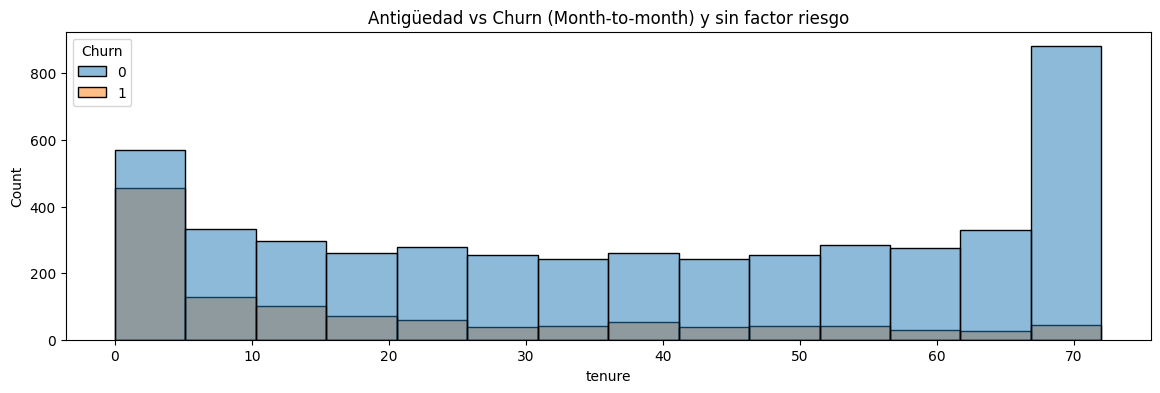

In [217]:
plt.figure(figsize=(14, 4))
sns.histplot(data=df_sin_factor_riesgo, x="tenure", hue="Churn")
plt.title("Antigüedad vs Churn (Month-to-month) y sin factor riesgo")
plt.show()

### Ademas podemos observar que el comportamiento sigue siendo parecido

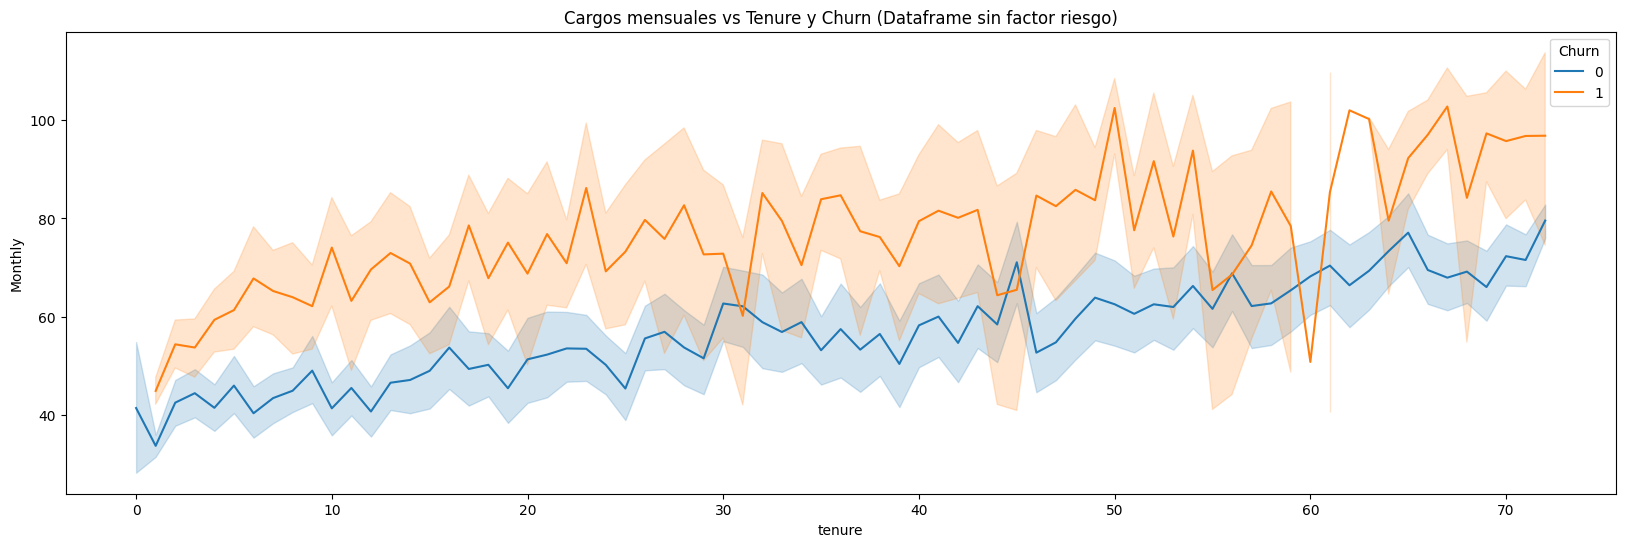

In [219]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="tenure", y="Monthly", hue="Churn", data=df_sin_factor_riesgo)
plt.title("Cargos mensuales vs Tenure y Churn (Dataframe sin factor riesgo)")
plt.show()

### La tendencia que se sigue manteniendo es que los clientes que pagan mas son los mas propensos a Abandonar

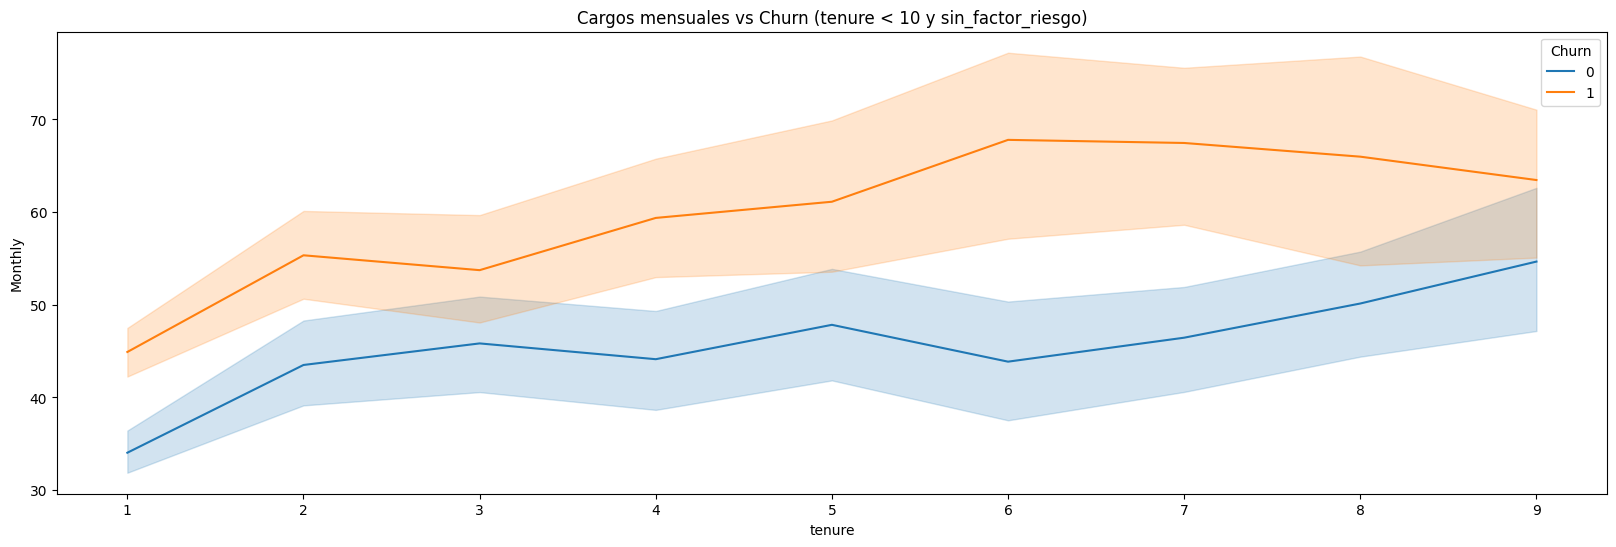

In [232]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_sin_factor_riesgo_10, y="Monthly",x="tenure", hue="Churn")
plt.title("Cargos mensuales vs Churn (tenure < 10 y sin_factor_riesgo)")
plt.show()

# Recomendaciones Finales
## 1. Mejorar el servicio de OnlineSecurity ya que al tener correlacion con el metodo de pago Electronik Check y puede existir una vulnerabilidad
## 2. Revisar la estabilidad de InternetService, ya que los que contaban con servicio de "Fiber optic" presentaban un gran porcentaje de abandono
## 3. Realizar investigacion de mercado ya que el abandono temprano y que estos paguen mas de lo normal puede indicar que otra compañia ofrecia un mejor plan de servicios.